%%HTML
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>

<div align="center">
    <h1>PMASE Capstone 2021</h1>
    <h2>Open Source - Systems (SysML) Modeling Enviroment</h2>
    <h3>Team Four Final Presentation </h3>
    John DeHart<br>
    Preston Kagiri<br>
    Mike Maldonado <br>
    Dave Masters<br>
    Brian Ritchey<br>
    Srividhya Sambamurthi<br><br>
    08/04/2021<br>
</div>

<div align="center" width=50>
    <h1>  Presentation Agenda</h1>
        <p align="justify">
            - Project Team<br>
            - SysML 2.0 Opportunities<br>
            - Open Source Environment<br>
            - Example Use Case: Rural Hospital Support System<br> 
            - Cost Model<br>
            - Modeling and Simulation Results<br>
            - Lessons Learned <br>
            - Next Steps<br> 
            - Q&A<br> 
        </p>
</div>


<center>
    <H2>Project Team</H2>
    <img src="images/project_team4.svg" style="width:1200px;height:800px"/>
</center>

# SysMLv2 What & Why
- SysmlV2 aims to be the Next-generation, Scalable, Enterprise-ready, Open Standard for MBSE
- SysMLv2 purpose is to facilitate increased adoption and effectiveness of MBSE over that of SysMLv1

# SysMLv2 Opportunities 
- Textual syntax potentially faster authoring, better for analysts and coders
- Architectural variation is built in at the core level of the modeling language
- Open Source Jupyter notebook platform - new way to ```Collaborate/Model/Document```
- Single MBSE environment offering a rich set of Modeling and Simulation tools
*- From the Capstone project perspective: The team 4 hedged between a pilot use of SysMLv2 within a collaborative development environment while modeling a real life use case*

<center>
    <img src="images/CIDE3.svg" style="width:1000px;height:900px"/>
</center>

<center>
    <H2>Multi-Kernel Notebooks - SoS</H2>
    <img src="images/multikernel.png" style="width:796px;height:710px"/>
</center>
<center><h4>Bo Peng and The University of Texas MD Anderson Cancer Center --> https://vatlab.github.io/sos-docs/</h4></center>

<center>
    <H2>pyMBE - Module to work with SysMLv2-API models</H2>
    <img src="images/pymbe.gif" style="width:1300px;height:750px"/>
</center>
<center><h4>guys.. sorry I could not do more with this --> https://github.com/bjorncole/pyMBE</h4></center>

<center>
    <H2>Integrated Workflow and Runtime Images [Elyra]</H2>
    <img src="images/workflow.svg" style="width:1200px;height:800px"/>
</center>
<center><h3>This could be a very powerful and easy to use 'grid' like workflow system --> IBM@https://github.com/elyra-ai/elyra</h3></center>

<center>
    <img src="images/validation_model.svg" style="width:1900px;height:909"/>
</center>
<center><h4>This is just a single run example... the validation table would normally be transposed with all runs listed for evaluation.</h4></center>

## Lets show an example of a SysMLv2 requirments validation workflow with the api...
http://localhost:8888/doc/tree/src/ASE6104/Users/John%20DeHart/dev/systems_analysis_workflow_example.pipeline

# Capstone system installation notes

- This lab is maintained on AWS (for now - tech owes me about $500)
- For code see: https://github.gatech.edu/jdehart7/ASE6104

In [2]:
package 'Development System - SysML Usage Summary'{
    
    doc /* Based on - A Practical Approach For Modellins Submarine Subsystem Architecture In SysML, Pierce and Friedenthal*/
        comment /* The concept of the SysML devlopment enviorment includes three (3) major parts - Modeling, Analysis, and Visulaiztion. */
        
    part 'Model Script'{
        comment /* We have to start with the local SysML Modeling Language -- Right??? */
    }
    
    part 'API' {
        comment /* The API permmits remote storage of local models after a build and validation event. The API and can return a query on a versioned model, part, etc... in a JSON format. */
    }
    
    part Data;
    part Trades;
    part Design;
    
    action 'System Analysis' {
        comment /* 1 - System Analysis - How To
        
        # Validate and Publish the 'raw' model to the API, Pull the JSON from the API and do some work (easy to work with a JSON)
        
        # 'OR' Build a set of tools to parse the 'raw' model locally to convert to JSON (or any necessary format). (Nesscesary now but not in the future... once we command the API)
        
        # Use pyMBE+ to develope systems engienring trades (Architecture + Parts(Attributes) + Part Library(Values) = Configurations) [Not there yet]
        */
            
        comment /* 2 - System Analysis - API Issues and Mitigation
        
        # There is some overhead accociated with an API. What happens when the API is down? Why push then pull everytime... seems redundant as some level.
        
        *** Will need Redundant APIs
        
        *** How would one create a model from say (get all parts that are blue) and then link them in a particular way? Its avalible in the API and the 'raw' models... but which one do I choose? (Why have the sysml model at all?)
        
        *** The integration between the 'raw' model and the API model only exist in one direction.
        
        *** Consider release of the JSON to the local enviorment at publish (https://groups.google.com/g/sysml-v2-release/c/zd7Mvi8YymQ)
        
        # The unidirectionality make the SysML model awkward to work with. To use the API you have to jump out look around and then pull down a JSON and somehow convert it to the SysML syntax???
        
        # Consider creating a set of tools to parse the 'raw' model locally to convert to an alterante format or push to a database (or any necessary format). 
        *** This begs the question why use the SysML syntax at all? Why not just build the models in JSON format and the bidirctionality is already there for the user at the local level and the new 'tools' are not necessary.
        
        */
        connect Data to 'System Analysis';
        connect Trades to 'System Analysis';
        connect Design to 'System Analysis';
    }
    
    action Modeling{
        comment /* SysML Modeling Language 
        ** Currently only using the 'raw' scripting
        ** Apparently everying that can be performed in the 'raw' can be perforemd in the API
        */
        connect 'Model Script'[1..*] to Modeling;
        connect 'API'[0..*] to Modeling;
        connect Modeling to 'System Analysis';
        connect Modeling to Visualization;
        
    }
    
    action Visualization{
        comment /* 3 - Vizualization and Presetnation Layer must be operator friendly, configurable, and most of all Present Well...
        
        ** Fairly limimted at this point
        
        ** Functionality similar too Magic Draw seems like a must for the general model developer
        
            *** Block dragging in this case is a good thing
            
        ** Must seemlessly integrate into the development system
        */
    }
    
}

Package Development System - SysML Usage Summary (bc1f2f61-bd25-4346-acb3-e10ffc5fc719)


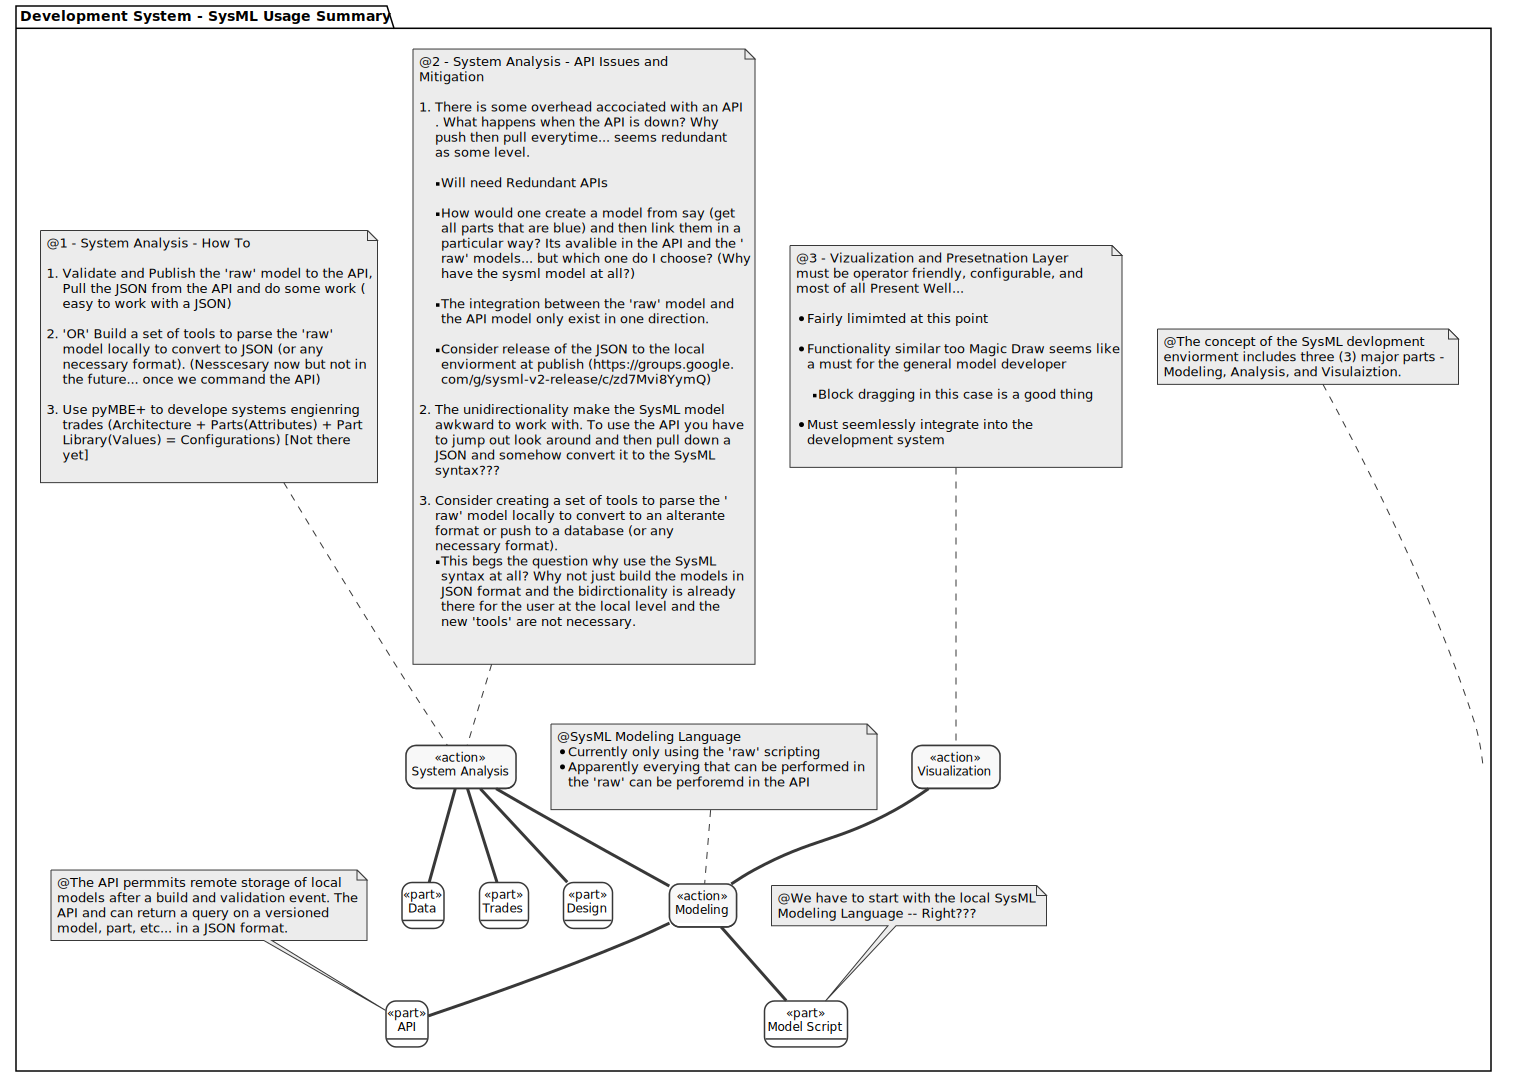

In [3]:
%viz "Development System - SysML Usage Summary" --view default

<center>
    <H2>SysML v2 - Modeling Workflow</H2>
    <img src="images/modeling_process3.svg" style="width:1200px;height:800px"/>
</center>
<center><h3>This issue seems real requiring some work<h3></center>

## Lets take a look as some of the integration for working with SysMLv2 direclty withing Python...
http://35.169.18.135/user/jdehart/doc/tree/ASE6104/Users/John%20DeHart/dev/1%20-%20import_models_test.ipynb

<center>
    <img src="images/ecos2.svg" style="width:1200px;height:800px"/>
<center>
    <h3>There is a lot of potential here... The concept of using JuptyerLab/Hub as an open-source backbone to facilitate a modeling development environment without the limitations of provider silos or the overhead of commercial software costs has been an eye opener for the team and our sponsors.</h3>

<div align="center">
    <h1>  Example Use Case: Rural Hospital Support System (RHSS) </h1>

## Rural Hospital Logistics was initiated by Doctors and Hospital Administrators concerned about timely and effective medical care to patients in rural areas. 

- Objective: deliver needed medicine and medical supplies medical providers in rural areas due to the high cost of maintaining stock or the low frequency of use.  
    - Certain medicines and medical supplies may be needed at a moments notice to treat patients in need, therefore, a fast, reliable, and cost effective transport mechanism is required to make the requested delivery.
    - Current system includes vehicle couriers.
- The Rural Hospital Support System medicine and medical supplies delivery system is comprised of five main elements organized in a hub, the supply hospital, and spoke, the rural hospital, configuration. 

# The five elements of the RHSS are:
   1. Unmanned Aerial Vehicles (UAVs) that transport medicine and supplies
   2. An order and inventory system for rural hospitals to initiate requests
   3. A communications and tracking system to provide UAV status and location data 
   4. A fulfilment function for loading the UAV
   5. A storage, maintenance, and charging facility for UAV maintenance
   
### The following charts provide details on benefits and operation of the Rural Hospital Support System.<br>

<center>
<H3>The Rural Hospital Support System is scalable to service a small number of rural hospitals to dozens if needed and extensible to other situations where critical material is needed in a timely, safe, and cost effective manner.</H3></center>

<center>
    <img src="images/OV1.svg" style="width:1200px;height:800px"/>
<center>

### Block Definition Diagram for Rural Medical Support System

In [4]:
package SupplyMedicalSupportSystem{
    
    	import ScalarValues::*;
    //item def Power;
    part RuralHospitalSupport{
 		part droneSystem[1..*]{
           part avionics{
              part wings{
                  port startWingsRotation;
              }
              //part cockpit;
              part engine{
                  port engineRunIn;
                  port getEnginePower;
              }
              part propeller{
                  port getPropellerPower;
                  port openWings;
              }
              part processor{
                  port wakeupDrone; 
                  port engineRunCmd;
                  port propellerStartCmd;
                  port setupPath;
                  port getDestInfo;
                  port heartbeatSignalSend;
                  port fetchMedicines;
                  port deliverMedicines;
              }
              connect processor::engineRunCmd to engine::engineRunIn;
              connect processor::propellerStartCmd to propeller::openWings;
              connect propeller::openWings to wings::startWingsRotation;
              
           }
           part commAndControl{
                part gps;
           }
           part power{
               part battery[1..2]{
                   port powerOut;
               }
               //part userInterface;
           } 
           part payload{
               port liftObject;
           }
           connect power::battery::powerOut to avionics::propeller::getPropellerPower;
           connect power::battery::powerOut to avionics::engine::getEnginePower;
           connect avionics::processor::fetchMedicines to payload::liftObject;
           connect avionics::processor::setupPath to commAndControl::gps;
           
           //stream of Power from power::battery::powerOut::providePower to avionics::propeller::battInput::inPower;
       }
		part ruralHospitals[2..5]{
            //part inventory;
            part communication{
                port Order;
                port sendOrder;
                port rxMedicines;
            }
            part personnel{
                port commOrder;
                port getMedicines;
            }
            connect personnel::commOrder to communication::Order;
            connect communication::rxMedicines to personnel::getMedicines;
        }
        
		//
		part centralHub{
            part centralCommunication{
                port orderRx;
                port startCmdDrone;
                port wakeDrone;
                port sendDestData;
            }
            //part inventory;
            part processor{
                port receivedOrder;
                port prepMedicine;
                port commDroneCmd;
                port medReady;
            }
            part tracker{
                //port currentLoc;
                port rxMonitorSignal;
            }
            part medicines[1..*]{
                part equipment;
                port rxCommand;
                port packMedicine;
            }
            connect centralCommunication::orderRx to  processor::receivedOrder;
            connect processor::prepMedicine to medicines::rxCommand;
            connect medicines::packMedicine to processor::medReady;
            connect processor::commDroneCmd to centralCommunication::startCmdDrone;
        }
        connect ruralHospitals::communication::sendOrder to centralHub::centralCommunication::orderRx;
        connect centralHub::centralCommunication::wakeDrone to droneSystem::avionics::processor::wakeupDrone;
        connect centralHub::centralCommunication::sendDestData to droneSystem::avionics::processor::getDestInfo;
        connect droneSystem::avionics::processor::heartbeatSignalSend to centralHub::tracker::rxMonitorSignal;
        connect centralHub::processor::medReady to droneSystem::avionics::processor::fetchMedicines;
        connect droneSystem::avionics::processor::deliverMedicines to ruralHospitals::communication::rxMedicines;
        //connect centralCommunication::orderRx to  
        //part def Engine;
        //part def Sensor[1..*];
   }
}

Package SupplyMedicalSupportSystem (9d5bd9bf-7fb5-48f5-9b6c-0afa0c229ead)


In [ ]:
%viz --view=tree SupplyMedicalSupportSystem

### State Diagram - Drone States

In [6]:
package SignalDefinitions{
    attribute def MedicalEventOccur;
    attribute def MedicineDelivered;
    attribute def DroneAvailable;
    attribute def DroneFlying;
    attribute def DroneReachedRuralHospital;
    attribute def DroneToRepair;
    attribute def every1s;
    attribute def selfTestFail;
    
}
package StateDefinitions{
    import SignalDefinitions::*;
 	part def Drone {
		selfTestResult : ScalarValues::Boolean;
	}
	part def CentralHub;
    
	action performSelfTest(in drone: Drone);
    action emergencyLanding();
    action failureDetected();
	
    state def DroneStates (operatingDrone : Drone);
		
    state droneState : DroneStates(operatingDrone : Drone, hub : CentralHub) { 
        entry; then idle;
    
        state idle;
        transition idle_to_waiting
            first idle
            accept MedicalEventOccur
            then waiting;
    
        state waiting;
        transition waiting_to_pickUp
            first waiting
            accept DroneAvailable
            then pickUp;
        
        state pickUp;
            accept DroneFlying
            then flying;
        
        state flying{
            state selfTest{
               // do action performSelfTest(selfTestResult);
                entry performSelfTest(in drone = operatingDrone);
            }
                //if selfTestResult
                    //do send stopDrone()
                //accept selfTestResult
                
            //state selfTest;
            accept every1s
            then selfTest;
            
            accept selfTestFail
            if operatingDrone::selfTestResult
            do send emergencyLanding() to hub
            then stopDrone;
            state stopDrone;
        }
       
            
            
        transition flying_to_delivered
            first flying
            accept DroneReachedRuralHospital
            then delivered;
        
        state delivered;
        transition delivered_to_idle
            first delivered
            then idle;
     }
}

Package SignalDefinitions (e761e587-7f3c-4c9b-a42d-04ae11c80560)
Package StateDefinitions (b988085f-5a2d-4756-a48f-eafca7e9170d)


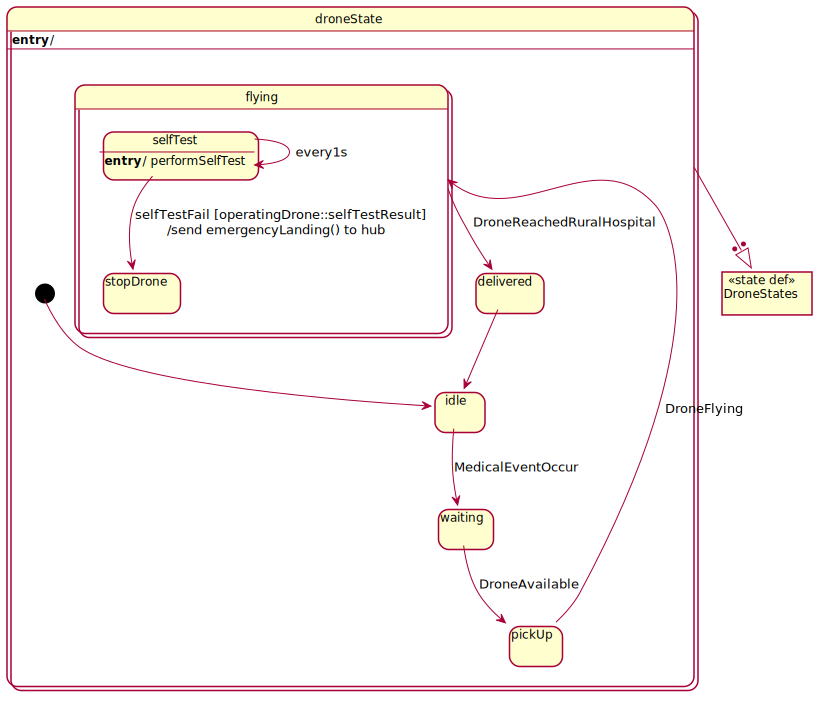

In [11]:
%viz --view=STATE  --style=STDCOLOR StateDefinitions

### Activity Diagram

In [8]:
	import ScalarValues::*;
//import RuralHospitalSupport::*;

//		part hospitals : RuralHospitals[2..5];

action def randomlyGenerateNeed;
action def pickMedicines(out Payload:Real);
action def loadPayload(in Payload:Real, out Payload:Real);
action def informCentralHub;
action def sendDrone;
action def trackDroneFromHub;
action def trackDroneFromHospital;
action def cellular_trackDrone;
action def landDrone;
action def unloadPayload(out Medicines:Real);
action def deliverToNurse(in Medicines:Real, out Medicines:Real);
action def returnToCentralHub;
action def updateInventoryStoreData;
action def checkBatteryLevel;
action def chargeBattery;
action def trackDrone;
action def checkConnectionStatus;
action def reestablishConnection;
action def continueFlight;
action def pickPayload;
action def packageBlood(out Blood:Real);
action def pickMedicine(out Medicines:Real);
item def batteryLevel;
item def connectionStatus;
item def payloadType;

    
action def supplyMedicines {
    first start;
    then action RandomlyGenerateNeed:randomlyGenerateNeed;
    
    then merge pickCorrectPayload;
    then action PickPayload:pickPayload {
        out item PayloadType:payloadType;
    }
    
    then decide;
    if PickPayload::PayloadType == "Blood" then PackageBlood;
    if PickPayload::PayloadType == "Medicine" then PickMedicine;
   
    action PackageBlood:packageBlood{out payload:Real; flow PackageBlood::payload to LoadPayload::payloadIn;}
    succession PackageBlood then LoadPayload;
    
    action PickMedicine:pickMedicine{out payload:Real; flow PickMedicine::payload to LoadPayload::payloadIn;}
     succession PickMedicine then LoadPayload;
    
action LoadPayload:loadPayload (in payloadIn stream from PickMedicine::payload);
    then action UpdateInventoryStoreData:updateInventoryStoreData;
    then action InformCentralHub:informCentralHub;
    then action SendDrone:sendDrone;
    
    then fork;
    then TrackDrone;
    then verifyConnectionStatus;
    
    action TrackDrone:trackDrone;
    then fork;
        then LOS_TrackDroneFromHub;
        then Cellular_TrackDrone;
        then LOS_TrackDroneFromHospital;
    
        action LOS_TrackDroneFromHub:trackDroneFromHub;
        then joinNode;
        action Cellular_TrackDrone:cellular_trackDrone;
        then joinNode;
        action LOS_TrackDroneFromHospital:trackDroneFromHospital;
        then joinNode;
    
    merge verifyConnectionStatus;
    then action CheckConnectionStatus:checkConnectionStatus {
        out item ConnectionStatus:connectionStatus;
    }
    
    then decide;
    if CheckConnectionStatus::ConnectionStatus == "True" then ContinueFlight;
    if CheckConnectionStatus::ConnectionStatus == "False" then ReestablishConnection;
   
    action ReestablishConnection:reestablishConnection;
    then verifyConnectionStatus;
    
    action ContinueFlight:continueFlight;
    then joinNode;
    join joinNode;
    
    then action LandDrone:landDrone;
    then action UnloadPayload:unloadPayload {out medicines:Real; flow UnloadPayload::medicines to DeliverToNurse::medicinesIn;} //(in medicines stream from LoadPayload::medicinesOut);
    // {out medicinesOut:Real;flow LoadPayload::medicinesOut to UnloadPayload::medicines;}
    then action DeliverToNurse:deliverToNurse(in medicinesIn stream from UnloadPayload::medicines);

    
    then merge verifyBatteryLevel;
    then action CheckBatteryLevel:checkBatteryLevel {
        out item BatteryLevel:batteryLevel;
    }
    
    then decide;
    if CheckBatteryLevel::BatteryLevel == "Sufficient" then ReturnToCentralHub;
    if CheckBatteryLevel::BatteryLevel == "Insufficient" then ChargeBattery;
   
    action ChargeBattery:chargeBattery;
    then verifyBatteryLevel;
    
    action ReturnToCentralHub:returnToCentralHub;

    then done;
    //allocate RuralHospitals to DetectLack;
}


ActionDefinition randomlyGenerateNeed (fb7798cd-e0aa-4420-8da5-e09958b762c3)
ActionDefinition pickMedicines (ad13ca14-bc98-4ec6-829a-f48b03e3c144)
ActionDefinition loadPayload (3650e9af-30e2-416c-87b5-b245e2c90ec4)
ActionDefinition informCentralHub (c2f6a6b5-5e10-4fec-a577-0702adc74682)
ActionDefinition sendDrone (c4d10468-e37f-4f37-a43d-f98805e0a00c)
ActionDefinition trackDroneFromHub (dbaaabd7-6687-4df7-a8fe-5e2833c83774)
ActionDefinition trackDroneFromHospital (2ec705cd-3887-49fd-8af3-695726db2fe5)
ActionDefinition cellular_trackDrone (7111e9a3-fa22-4486-8b5a-92d24f159391)
ActionDefinition landDrone (bd64433c-d715-435d-ab3a-1371ed4f029e)
ActionDefinition unloadPayload (a7320ccb-5415-49e3-887e-c272fe72b920)
ActionDefinition deliverToNurse (cf6a5b17-fbb9-4733-a05c-e3502876e7ae)
ActionDefinition returnToCentralHub (63cfede9-97ec-4b03-95e4-3bd8e68c902c)
ActionDefinition updateInventoryStoreData (8e74b975-8ba2-4ec1-8377-b1c82122db30)
ActionDefinition checkBatteryLevel (07f7cc88-a755-47ff

In [9]:
%viz supplyMedicines

### Cost Model 

<center>
    <img src="images/Emory.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Ground1.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Ground3.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Drone1.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Drone3.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Comparative.jpg" style="width:1200px;height:700px"/>
<center>

# Simulation Model - Netlogo
- Develop an agent based model to simulate payload pickup and delivery

**Agents:** hubs, subhubs, hospitals, payloads, couriers, drones<br>

1. Basic model includes: 
    - **Hub(s):** Central location for distribution of medicines, medical supplies, drones, couriers, payloads
        - Currently only one (1) hub with Emery University Hospital as main hub 
        - States: `waiting`
    - **SubHubs:** Supporting locations may produce and recieve payloads (Can support drones)
        - States: `idle`, `waiting`
        - Varaibles: status, name
    - **Hospitals:** Hospital can request and recieve payloads (Can charge drones, cannot support drones)
        - States: `idle` `waiting`
        - Request Types: `3-standard` `2-urgent` `1-emergency`
    - **Drones:** Initialize at hub(s) and deliver payload to requesting agents (hubs, subhubs, hospitals)
        - States: `waiting` `delivering` `recharging` `charged` `lost`
    - **Payloads:** Initialize at hub(s) and subHubs and are delivered by drones to requesting target
        - States: `waiting` `delivered` `lost`
    - **Couriers:** Baseline delivery fleet of vehicles for performance comparison
         - States: `waiting` `delivering` `lost`

# Simulation Model - Netlogo Detailed
- **Hub(s):** Central location for distribution of medicines, medical supplies, drones, couriers, payloads
        - Has charge station or replacment battery
        - Currently only one (1) hub with Emory University Hospital as main hub (https://www.emoryhealthcare.org/locations/hospitals/emory-university-hospital/index.html)
        - States: `waiting`
        - Message Queue for non-emergency requests prioritized (sorted) by request type [Standard(3), Urgent(2)]
        - Dedicated message queue for emergency requests [Emergency(1)]
        - Varaibles: status, name
- **SubHubs:** Supporting locations may produce and recieve payloads (Can support drones)
        - Has charge station or replacment battery
        - Currently only emory hospitals are modeled as subhubs (https://www.emoryhealthcare.org/locations/#)
        - States: `idle`, `waiting`
        - Varaibles: status, name
- **Hospitals:** Hospital can requests and recieve payloads (Can charge drones, cannot support drones)
        - May have charge stations or replacement battery
        - States: `idle` `waiting`
        - Request Types: `3-standard` `2-urgent` `1-emergency`
        - Varaibles: responseTime, curriorType, hascargeStation, eventType, status, name
- **Drones:** Initialize at hub(s) and deliver payload to requesting agents (hubs, subhubs, hospitals)
        - States: `waiting` `delivering` `recharging` `charged` `lost`
        - Variables: rechargeRage, dischargeRate, chargeLevel, speed, target, class, status, name, origin, pickupLoc, payloadCapability
- **Payloads:** Initialize at hub(s) and subHubs and are delivered by drones to requesting target
        - States: `waiting` `delivered` `lost`
        - Variables: origin, target, class, status, name, weight
- **Couriers:** Baseline delivery fleet of vehcles for performance comparison
         - States: `waiting` `delivering` `lost`
         - Variables: origin, pickupLoc, target, class, status, name, avgSpeed

# Simulation Model - Assumptions
- Primary Hub with Emory University Hospital
- Nine (9) Supporting Sub Hubs 
- Couriers simplified models with delivery and return times based on best guess GIS data
- Hospitals request payloads (Standard & Emergency)
    - Emergnencies are moved to the front of the queue
- Drones modeled as Heavy, Medium, Light 
    - Post delivery drones return to the*closest hub or subhub
    - Drones are selected by weight capability for delivery
- Medical requests are probabilistic (Standard, Emergnecy)
- Time, Distance, and Speed
    - 1 minute / tick
    - Distance = 1 km / patch
    - Speed = km/minute (60mph ≈ 1.6 km/minute or 1.6 patches/tick)

# Simulation Model - Assumptions Detailed
- Currently only one **(1) Primary Hub with Emory University Hospital** (https://www.emoryhealthcare.org/locations/hospitals/emory-university-hospital/index.html)
- Currently only nine **(9) Supporting Sub Hubs** (https://www.emoryhealthcare.org/locations/#)
- **Hospitals** are modeled withing a **service area** (radius = 170km max)(≈106.5 miles) from 0,0 
- **Payloads** may have an **origin** (hub or subhub) and a **target** (hubs, subhubs, hospitals) (origins on/off bit)
- **Couriers** simplified models with delivery and return times based on best guess GIS data (see http://35.169.18.135/user/jdehart/doc/tree/ASE6104/Users/Team/netlogo/courier_calcs.ipynb)
- **Hospitals** request payloads (Standard & Emergency)
    - Emergencies are moved to the front of the queue
    - May have a charge station or a battery replacment program
    - Payload **targets only, not payload origins** 
- **Drones** modeled as Heavy, Medium, Light (dischargeRate(dischargeConstant, payloadMass), failureRate, maxSpeed, rechargeRate)
    - Post delivery drones **return** to the **closest hub or subhub** (main hub only - on/off bit)
    - May be dedicated to emergency service only (numberof, on/off bit)
    - Drones are **selected by weight capability** for delivery
    - Selection by **range capability** (TBD)
    - May **fly** over **airports** and **residential areas** at **0km**
- **Medical requests** and lost payloads are **probabilistic** (Standard, Emergnecy) --> moving to random-poisson
- Medical Supply Chain and handling operations times are not modeled
- **Selected drone** or courier are **nearest-to** then **first-avalible**
    - Nearest drone if waiting and charged (may not be load capable)
    - If drone not avalible then courier
- Time, Distance, and Speed
    - 1 minute / tick
    - Distance = 1 km / patch
    - Speed = km/minute (60mph ≈ 1.6 km/minute or 1.6 patches/tick)
- **Cost Model** (TBD)

# Simulation - Measures of Performance
- # MoPs 
    - avgDeliveryTimeByRequestType(Standard, Emergency)
    - avgDeliveryTimeByType(Heavy(Standard, Emergency), Medium(Standard, Emergency), Light(Standard, Emergency), Courier(Standard, Emergency))
    - avgDeliveryTimeBy(BatteryNetowrkType(Recharge, Replace, Mixed))
    - avgDelvieryTimeBy(DedicatedEmergencyDrones(Standard, Emergency)
    - avgDeliveryTimeByNumberofDrones(10bit[1-3] Integer Genome) 
        - example: [1122300000] = 2-light, 2-medium, 1-heavy

# CIDE - Closing Notes

- Open Source platform allowing collaborative development

- There is something beautiful about the relaxed nature of this environment

    - Maybe we dont try and control every mouse click and constantly build UI(s)...
    - Provide some pre-defined karate moves for beginners and let the pros hack away
    - Offer a few templates for combinatorial expansion, trades, simulation, and validation + SysMLv2 Integration (See Workflow --> Elyra)
    - Develop a few modules for connection between Sysml & `open source` tools (scilab, modelica, octive...)
    - Don't try to make IDEs within the IDE... keep it simple and let the pros do their work in free space

## If we have time --> RMSS NetLogo model demo

<center>
    <H1>Simulation Model - Results</H1>
</center>

# Simulation Summary
Several drone delivery strategies were considered relative to the courier model (three drone types light, medium, heavy)

- Drone delivery Strategies
    - Delivery with battery replacement
    - Delivery with recharge
    - Delivery with no recharge or replacement
    - Battery replacement and use of `eDrone` (eDrone strategy utilizes [1-3] dedicated drones for emergencies only)

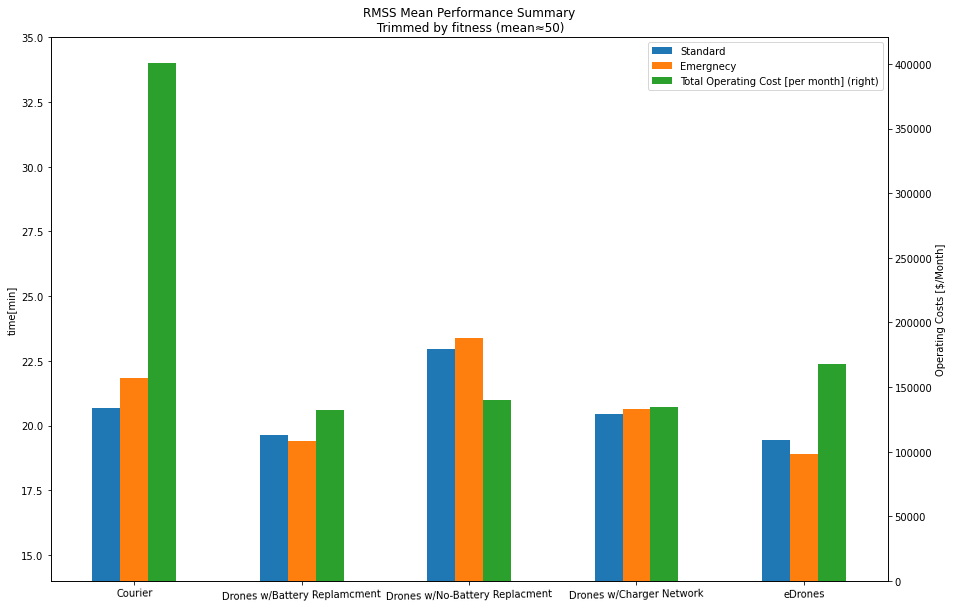

Average courier delivery time ≈ 21 min | Cost per month ≈ 390K (4.7M/y) {Note: Cost delta due to startup cost in model ≈800K)<br> 
Average eDrone delivery time ≈ 18 min | Cost per month ≈ 175K (2.1M/y) <br>
Average drone/battery replacement delivery time ≈ 19.5 min | Cost per month ≈ 140K (1.68M/y) <br>

### Courier Model - Response Histograms
Respsone times             |  Costs
:-------------------------:|:-------------------------:
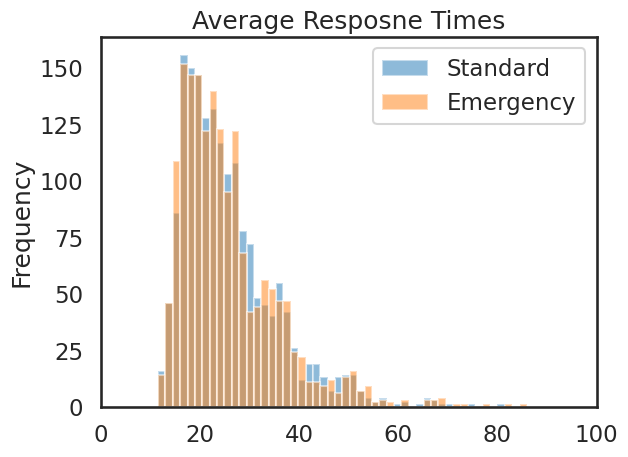  |  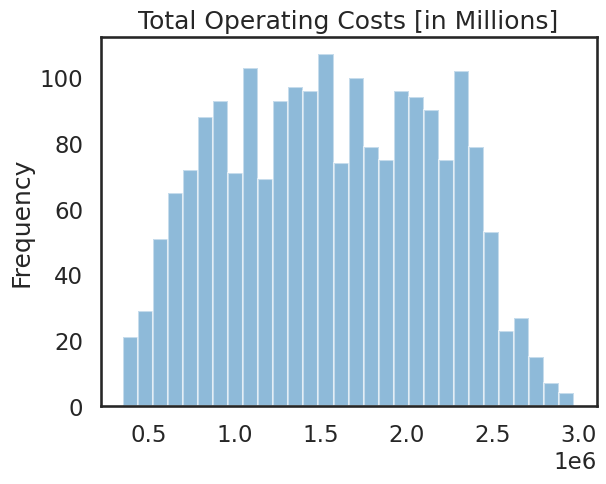
Mean Response time ≈20min | Mean Total operating costs ≈1.8M

## Bivariate analysis of courier model  - emergency only
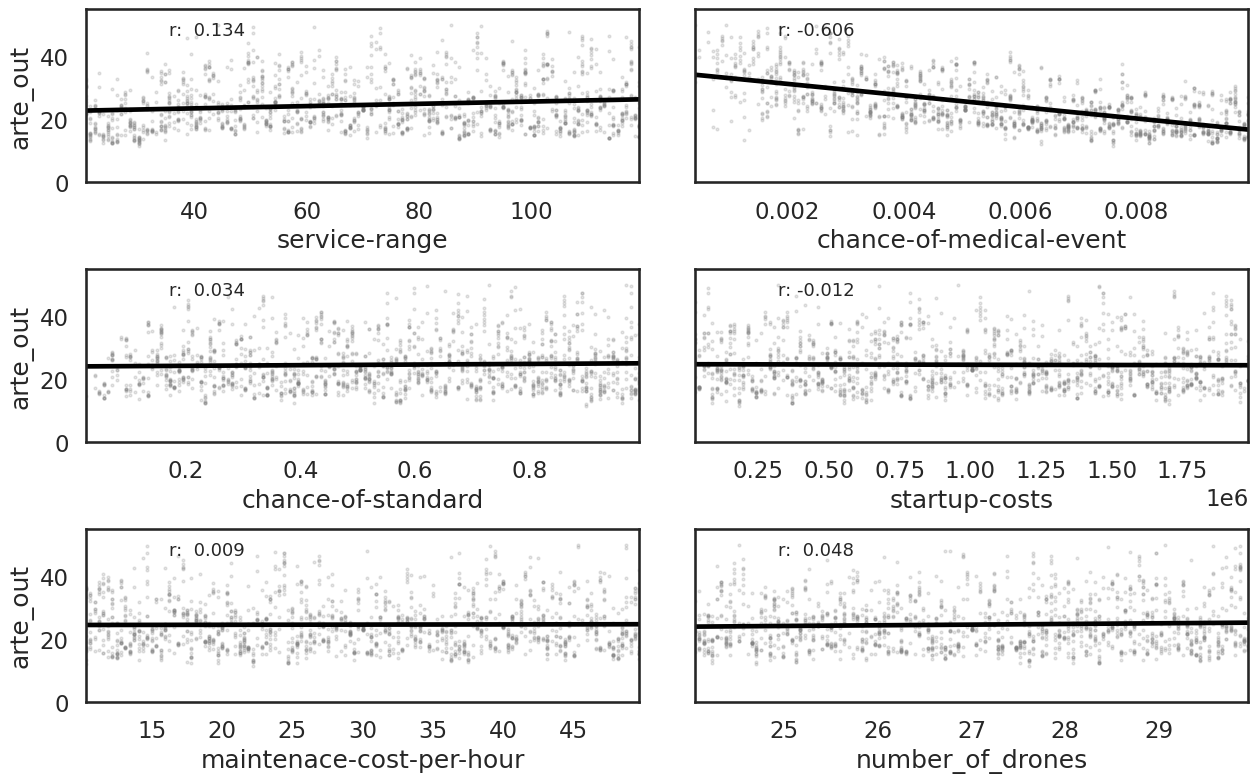<br>
<h3><center><i>Interesting</i> the lower the chance of a medical event the longer the mean `emergency` response time. Emergencies have to wait for the working drones to return to the hub before starting a delivery (even if they are moved to the front of the queue).</center></h3>

## Bivariate analysis of courier model  - Costs
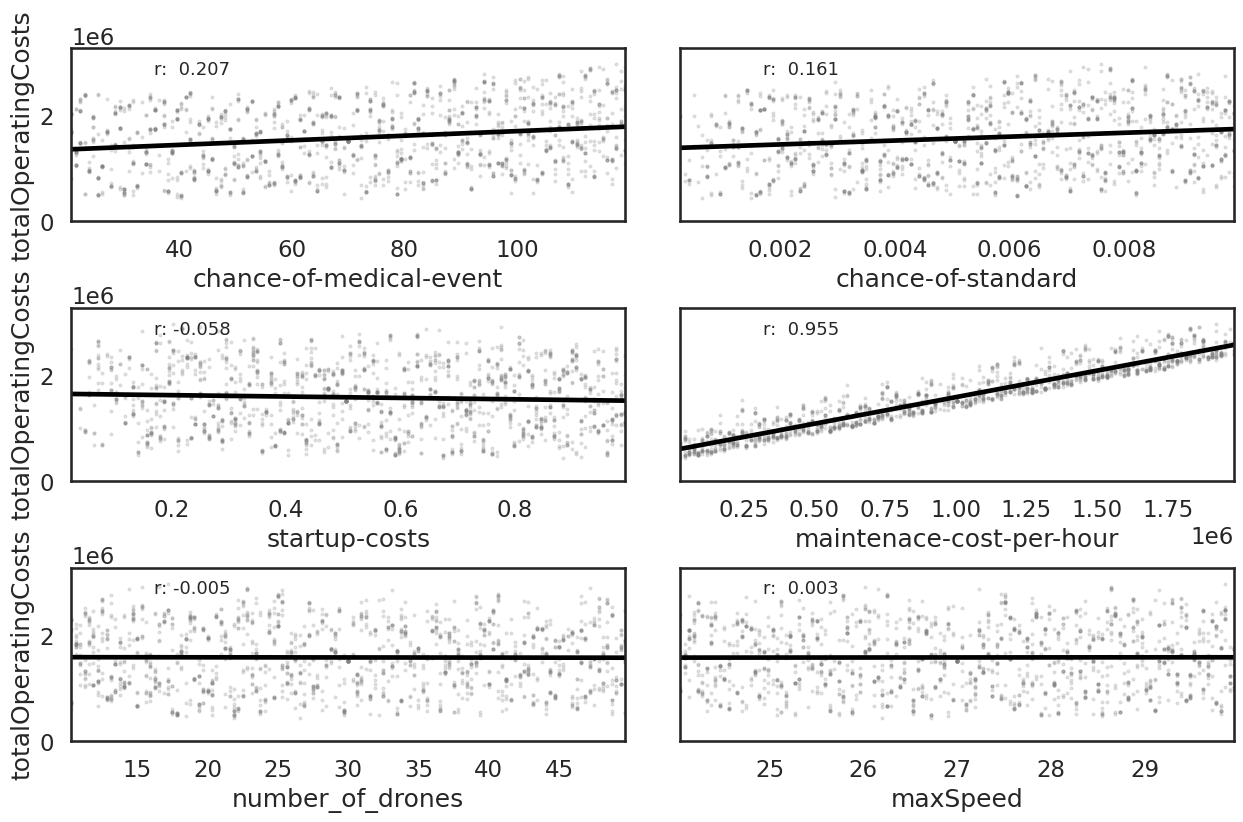
<h3><center>Maintenance costs per hour really drive the cost model</center></h3>

### eDones Model - Response Histograms
Respsone times             |  Costs
:-------------------------:|:-------------------------:
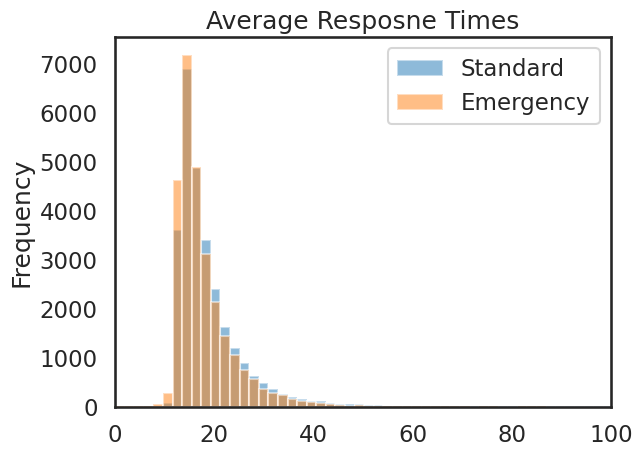  |  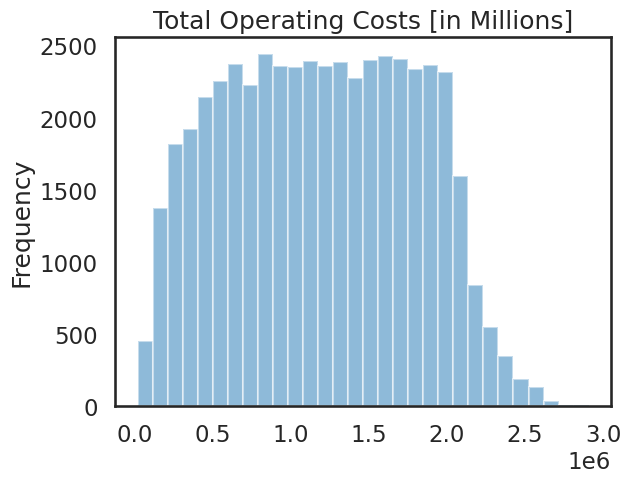
Mean Response time ≈18min | Mean Total operating costs ≈1.2M

## Bivariate analysis of eDrone model
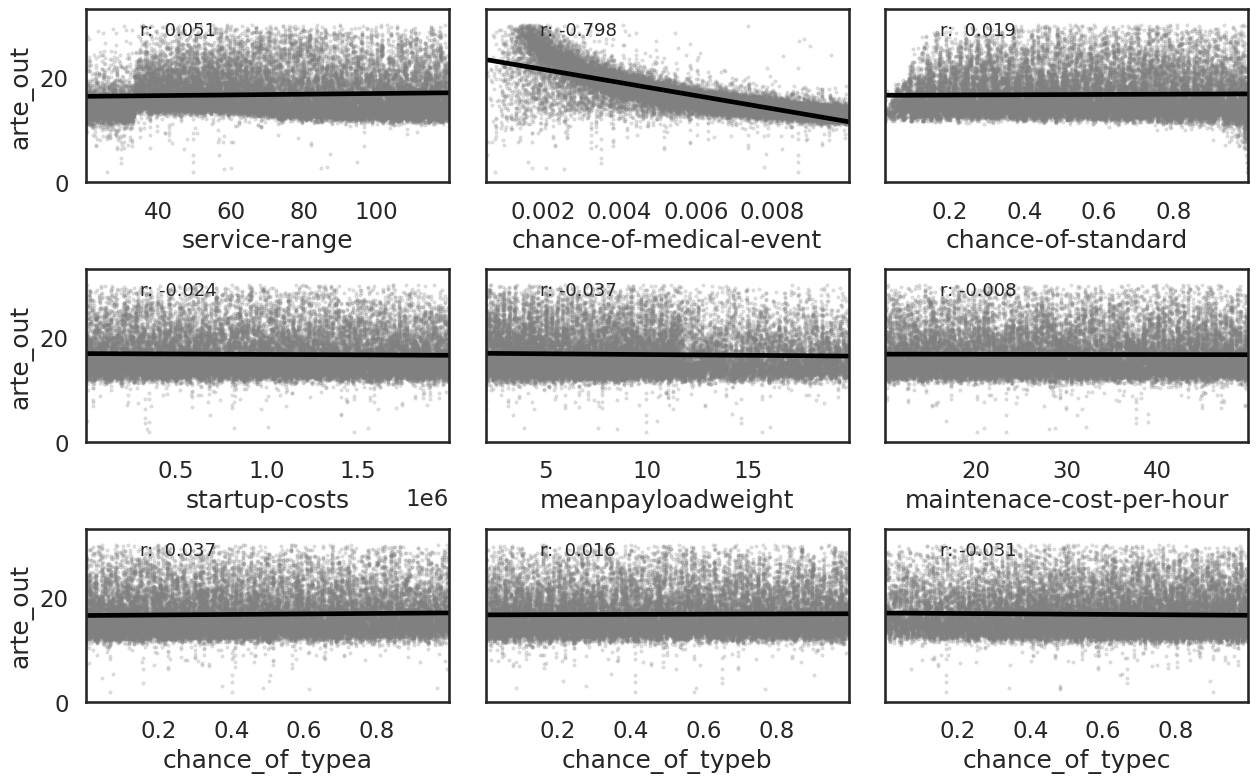
<center><h3>Similar negative effect for `chance of medical` event (of course) with service-range having minimal effect</h3></center>

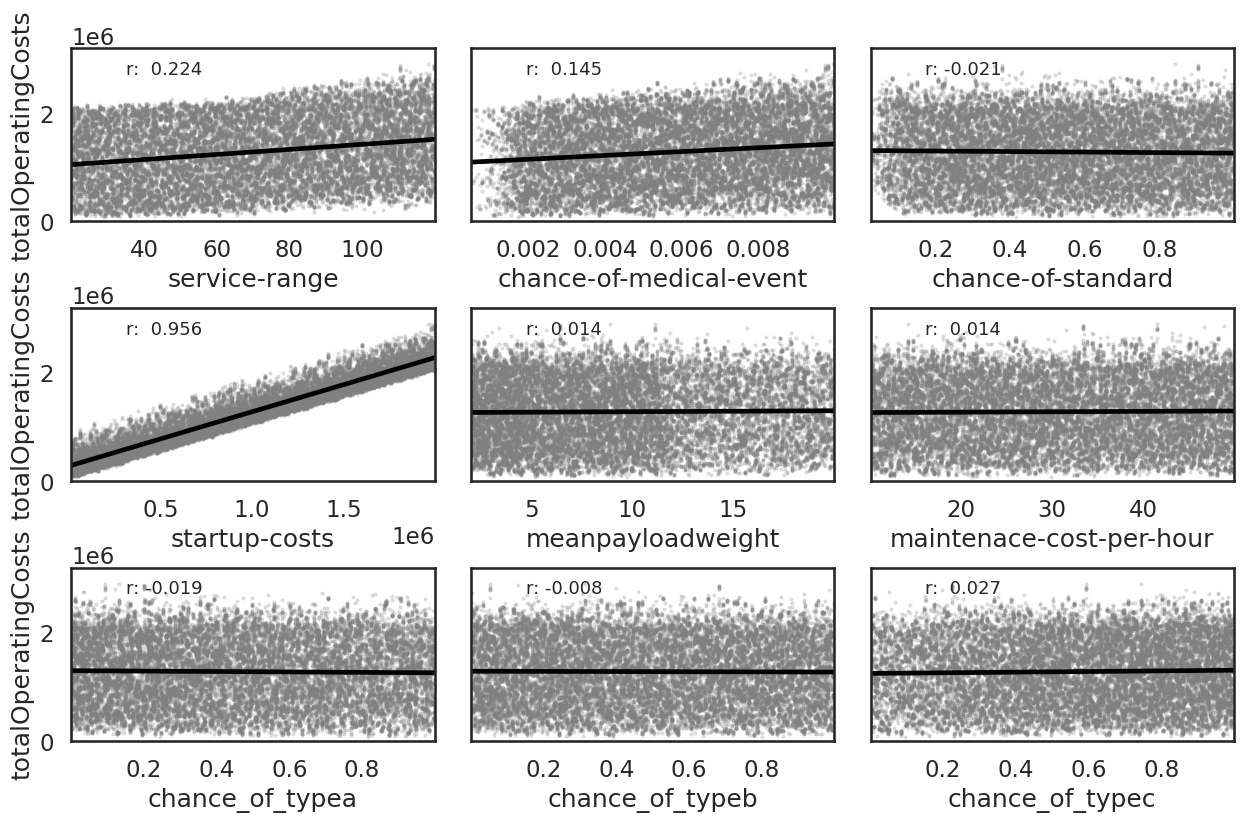
<center><h3>Startup costs driving  the overall total cost model</h3></center>

# Sensitivity Study
### This model is based on work by: Saltelli
- Great book... game changer for myself back in the day
- Sensitivity Analysis in Practice: A Guide to Assessing Scientific Models 1st Edition (Available from author here --> http://www.andreasaltelli.eu/file/repository/SALTELLI_2004_Sensitivity_Analysis_in_Practice.pdf)
    - by Andrea Saltelli (Author), Stefano Tarantola (Author), Francesca Campolongo (Author), Marco Ratto (Author)

### Senstivity Analysis
- **Total-order index[ST]**: Measures the contribution to the response variance caused by a model input, including both its first-order effects (the input varying alone) and all higher-order interactions.
- **First-order indices[S1]**: Measures the contribution to the response variance by a single model input alone.
- **Second-order indices[S2]**: Measures the contribution to the response variance caused by the interaction of two model inputs.
- 95% confidence intervals

### Courier Model - Sensitivity Study, Emergency Only
Indices/confidence intervals            |  Parameter Interaction
:-------------------------:|:-------------------------:
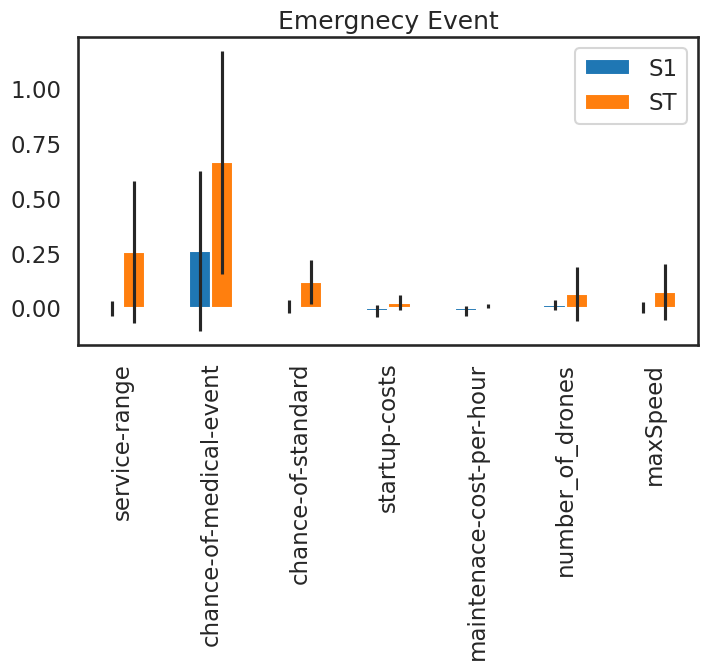  |  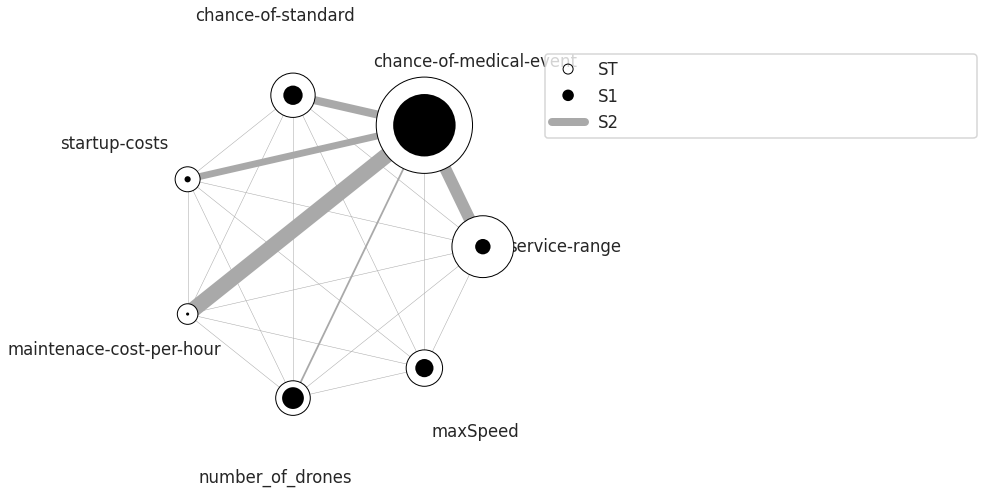

1. Total and first order effecters - `Chance of medical event` and `service range`
2. Interesting second order impact for `maintenance costs` and `chance of medical event` - looks like this is just an anomaly of independence of variables... fairly limited model

### Courier Model - Sensitivity Study, Total Operating Costs
Indices/confidence intervals            |  Parameter Interaction
:-------------------------:|:-------------------------:
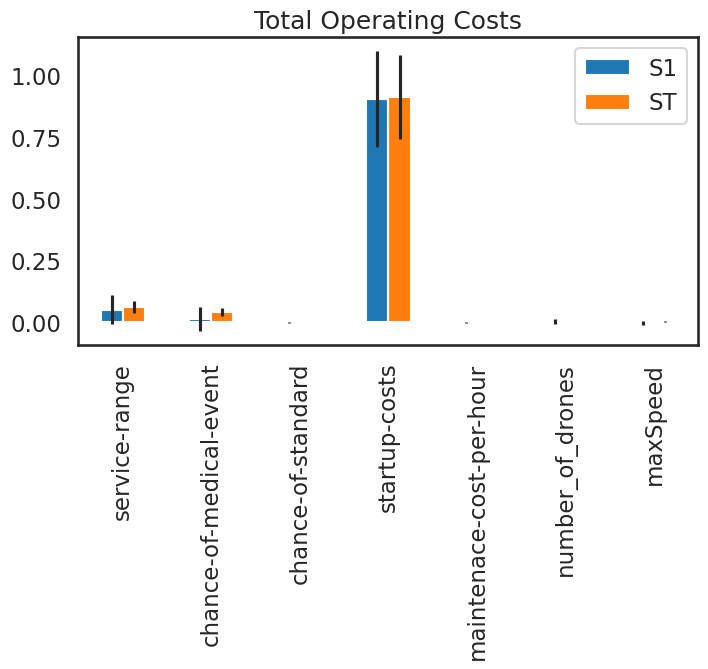  |  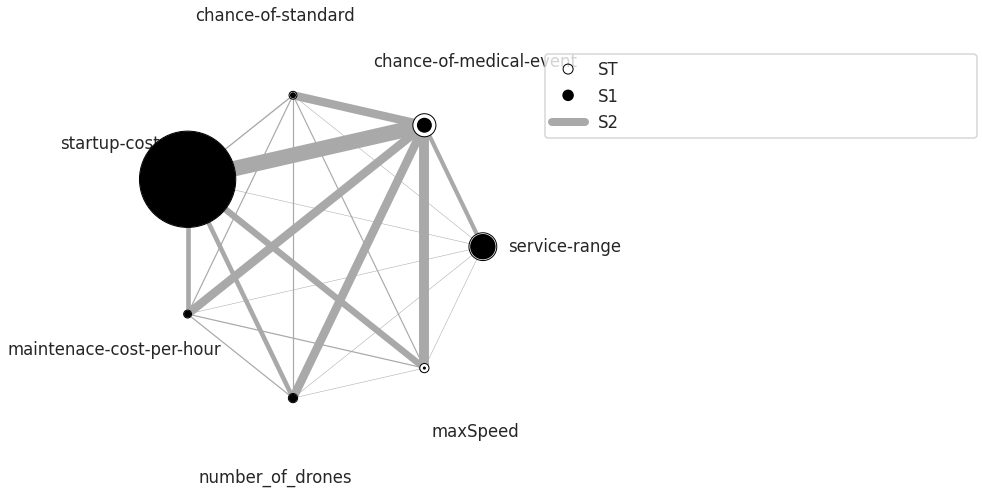

1. `Startup costs` dominate the `total operating cost` response.

### eDrone Model - Sensitivity Study, Emergency Only
Indices/confidence intervals            |  Parameter Interaction
:-------------------------:|:-------------------------:
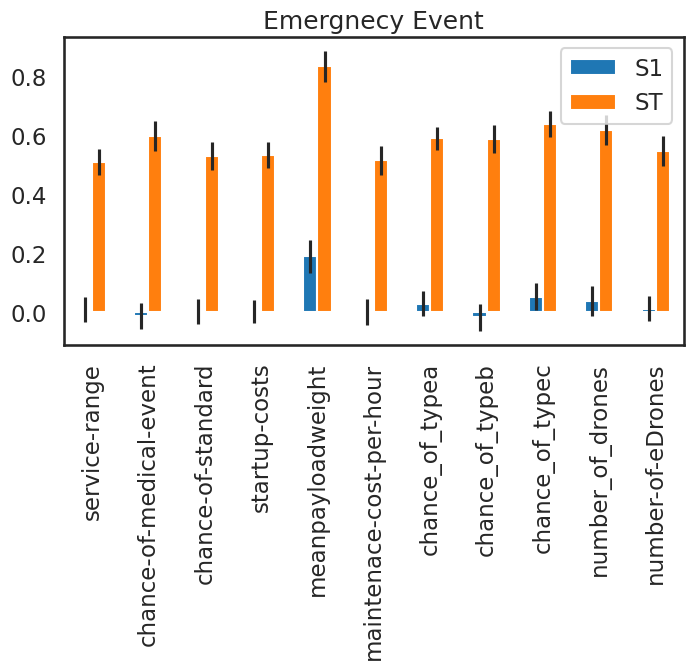  |  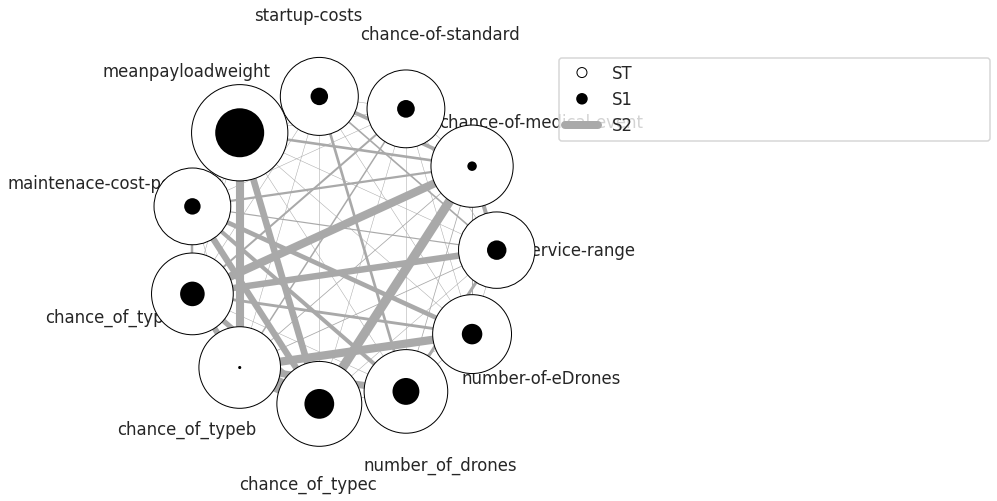

1. Unfortunate normalizing of ST indices due to modeling methods and dimensionality reduction of drone models
2. Interesting first order effects of `mean payload weight` on emergency response time. Larger mean requires `heavy` drones which are much faster than light and medium drones.

### eDrone Model - Sensitivity Study, Total Operating Costs
Indices/confidence intervals            |  Parameter Interaction
:-------------------------:|:-------------------------:
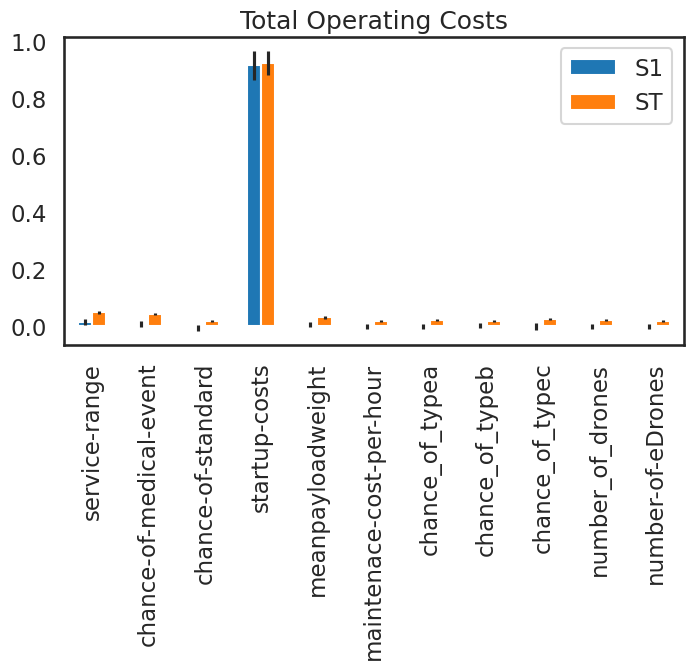  |  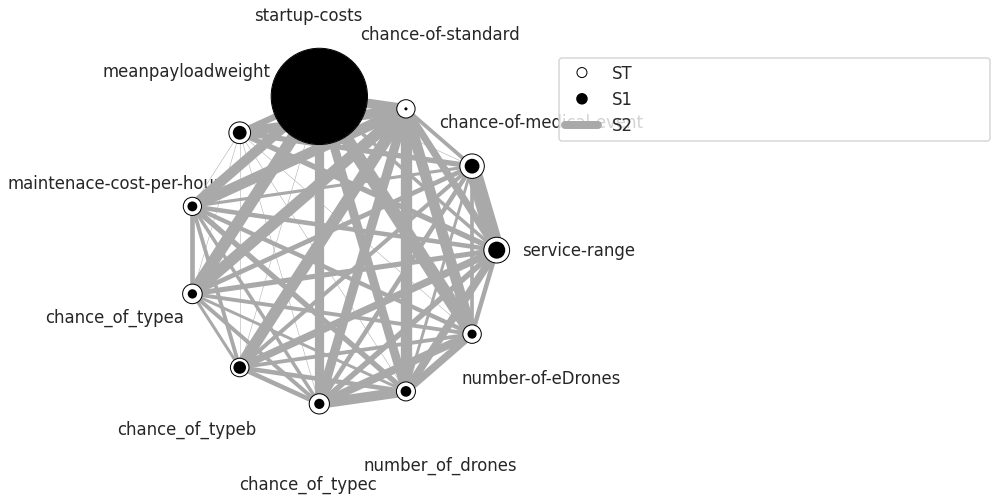

1. `total operating cost` - Driven by `startup costs` for drone systems
2. High number second order effects indicate low dimensionality model (needed to remove non-players and add a few others that may have produced effects)

<center>
    <h1>  Model Center Comparison: Average Response Time </h1>
</center>

- Compared the one from the Jupyter environment with a simpler Model Center model as a sanity check.

- Objective: Reduce Average Response Time  
    - Dakota Coliny Evolutionary Algorithm
    - Design Variable - Distance to nearest Hub.
    - Constraint - Speed - 40 mph for Medium Drone
    - Payload - 3 kgs 
    
## Average Response Time 10 to 19 minutes.

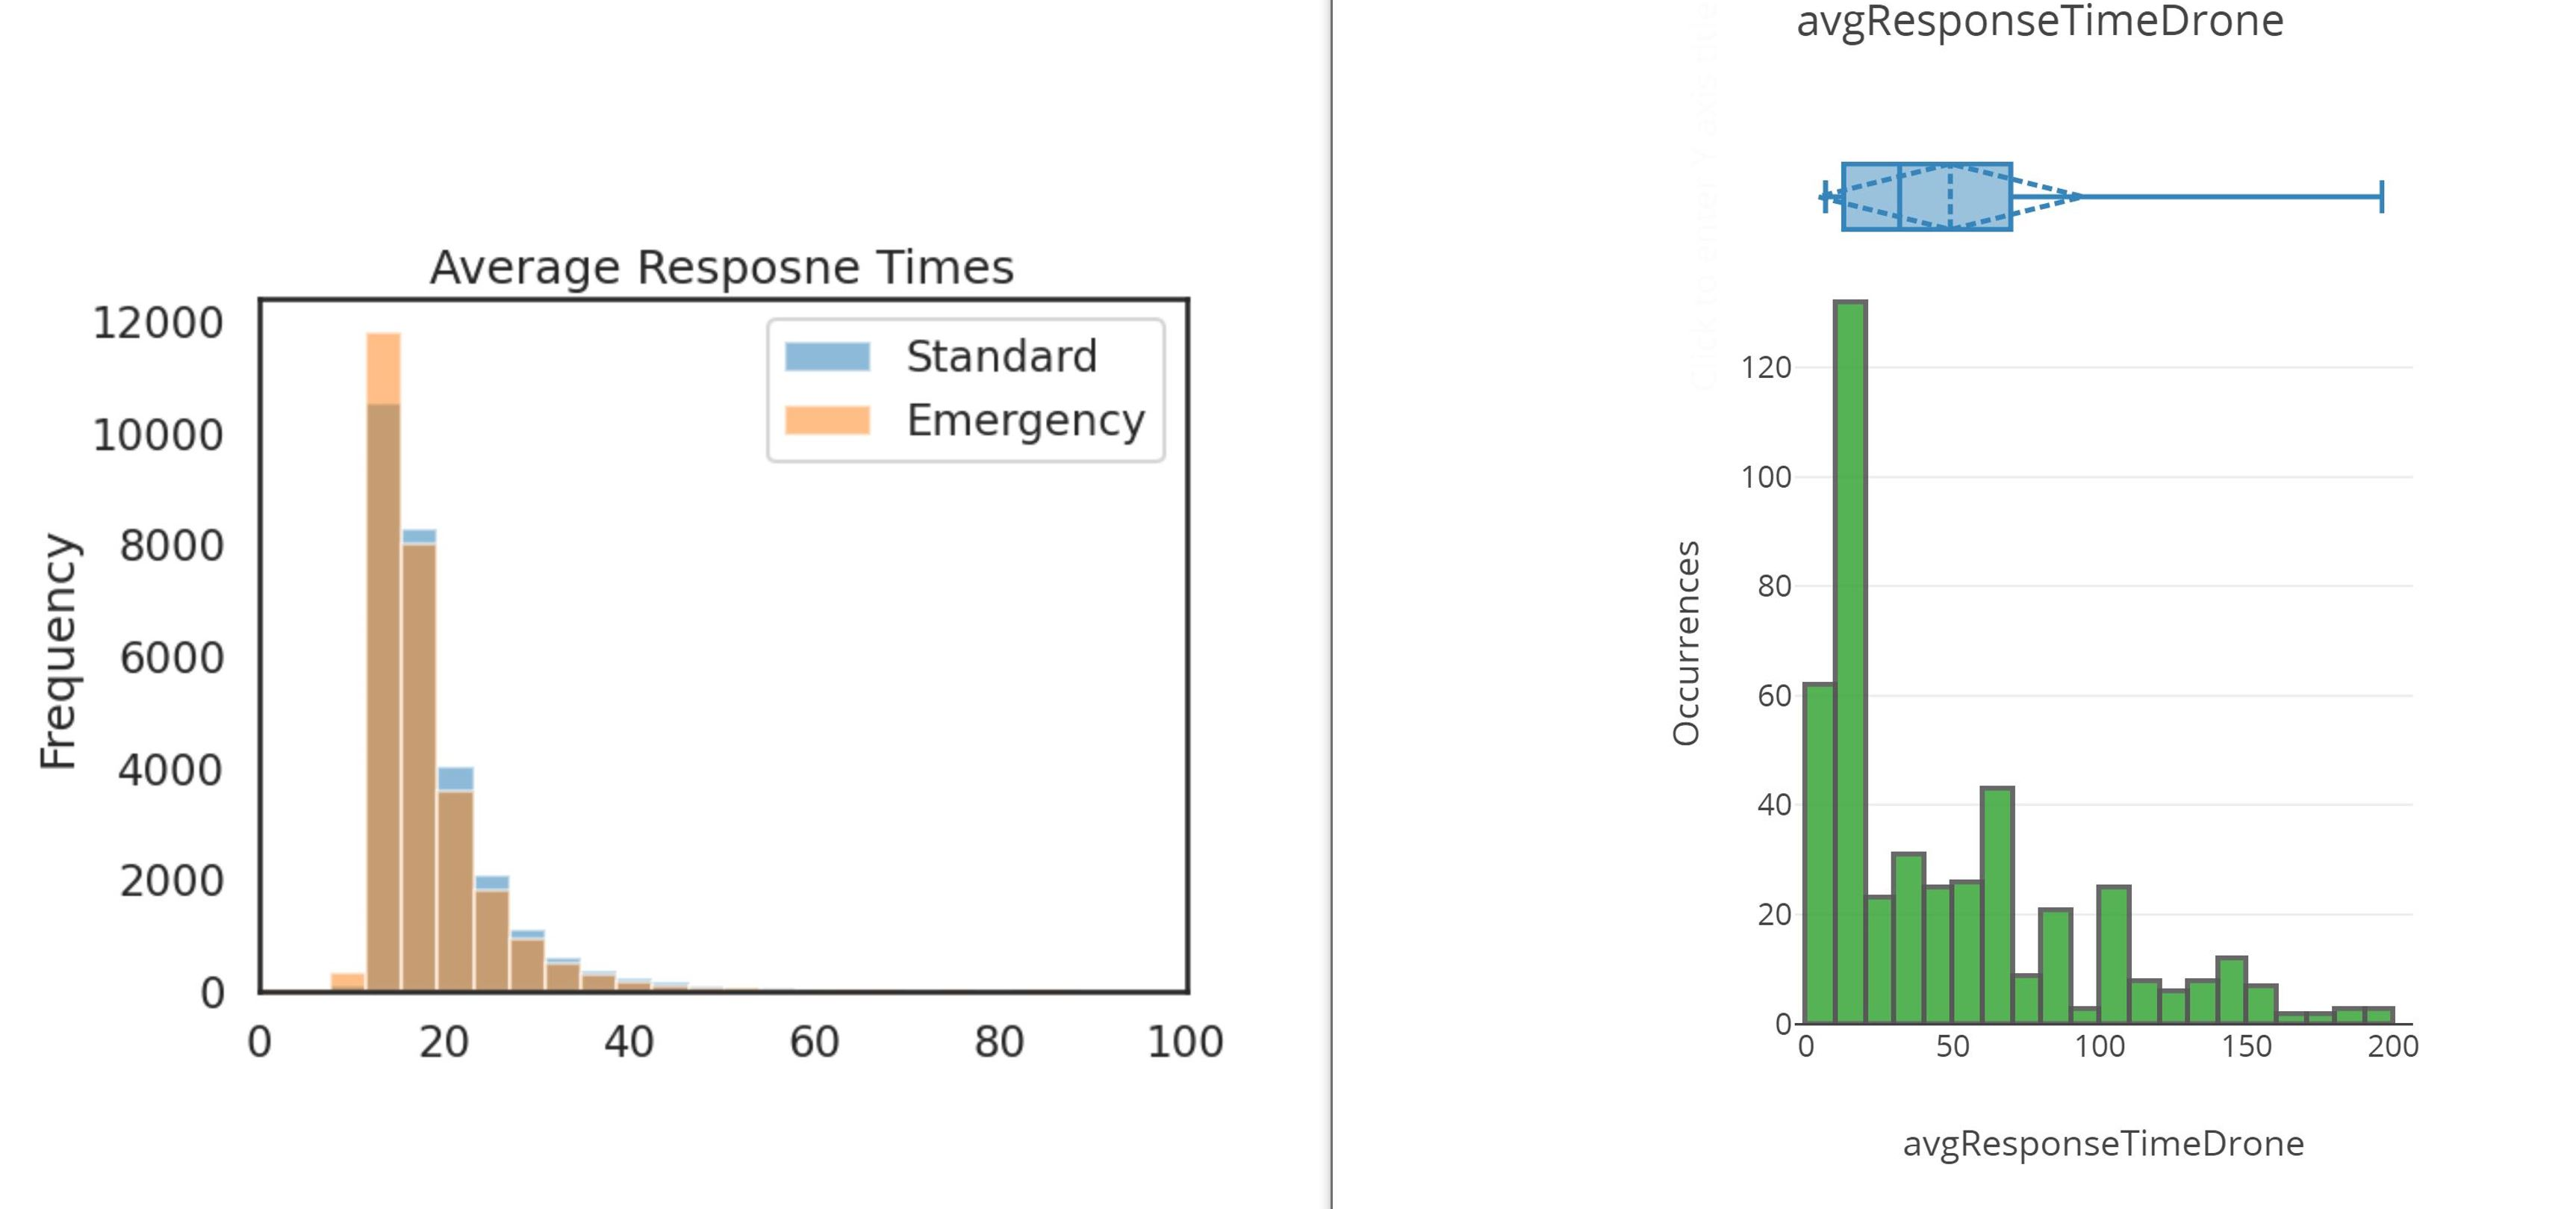

<div align="center">
    <h1>  Comparison: Optimizations - Total Operating Costs </h1>

- Compared the one from the Jupyter environment with Model Center to test the rugged of sensitivity analysis.

- Objective: Reduce Average Response Time  
    - EVOLVE Algortithm
    - Design Variable -  Startup Cost, Upfront Costs.
    - Constraint - Speed - 40 mph for Medium Drone
    
    
## Total Operating Costs - 1.5 Million Dollars Per Year. 

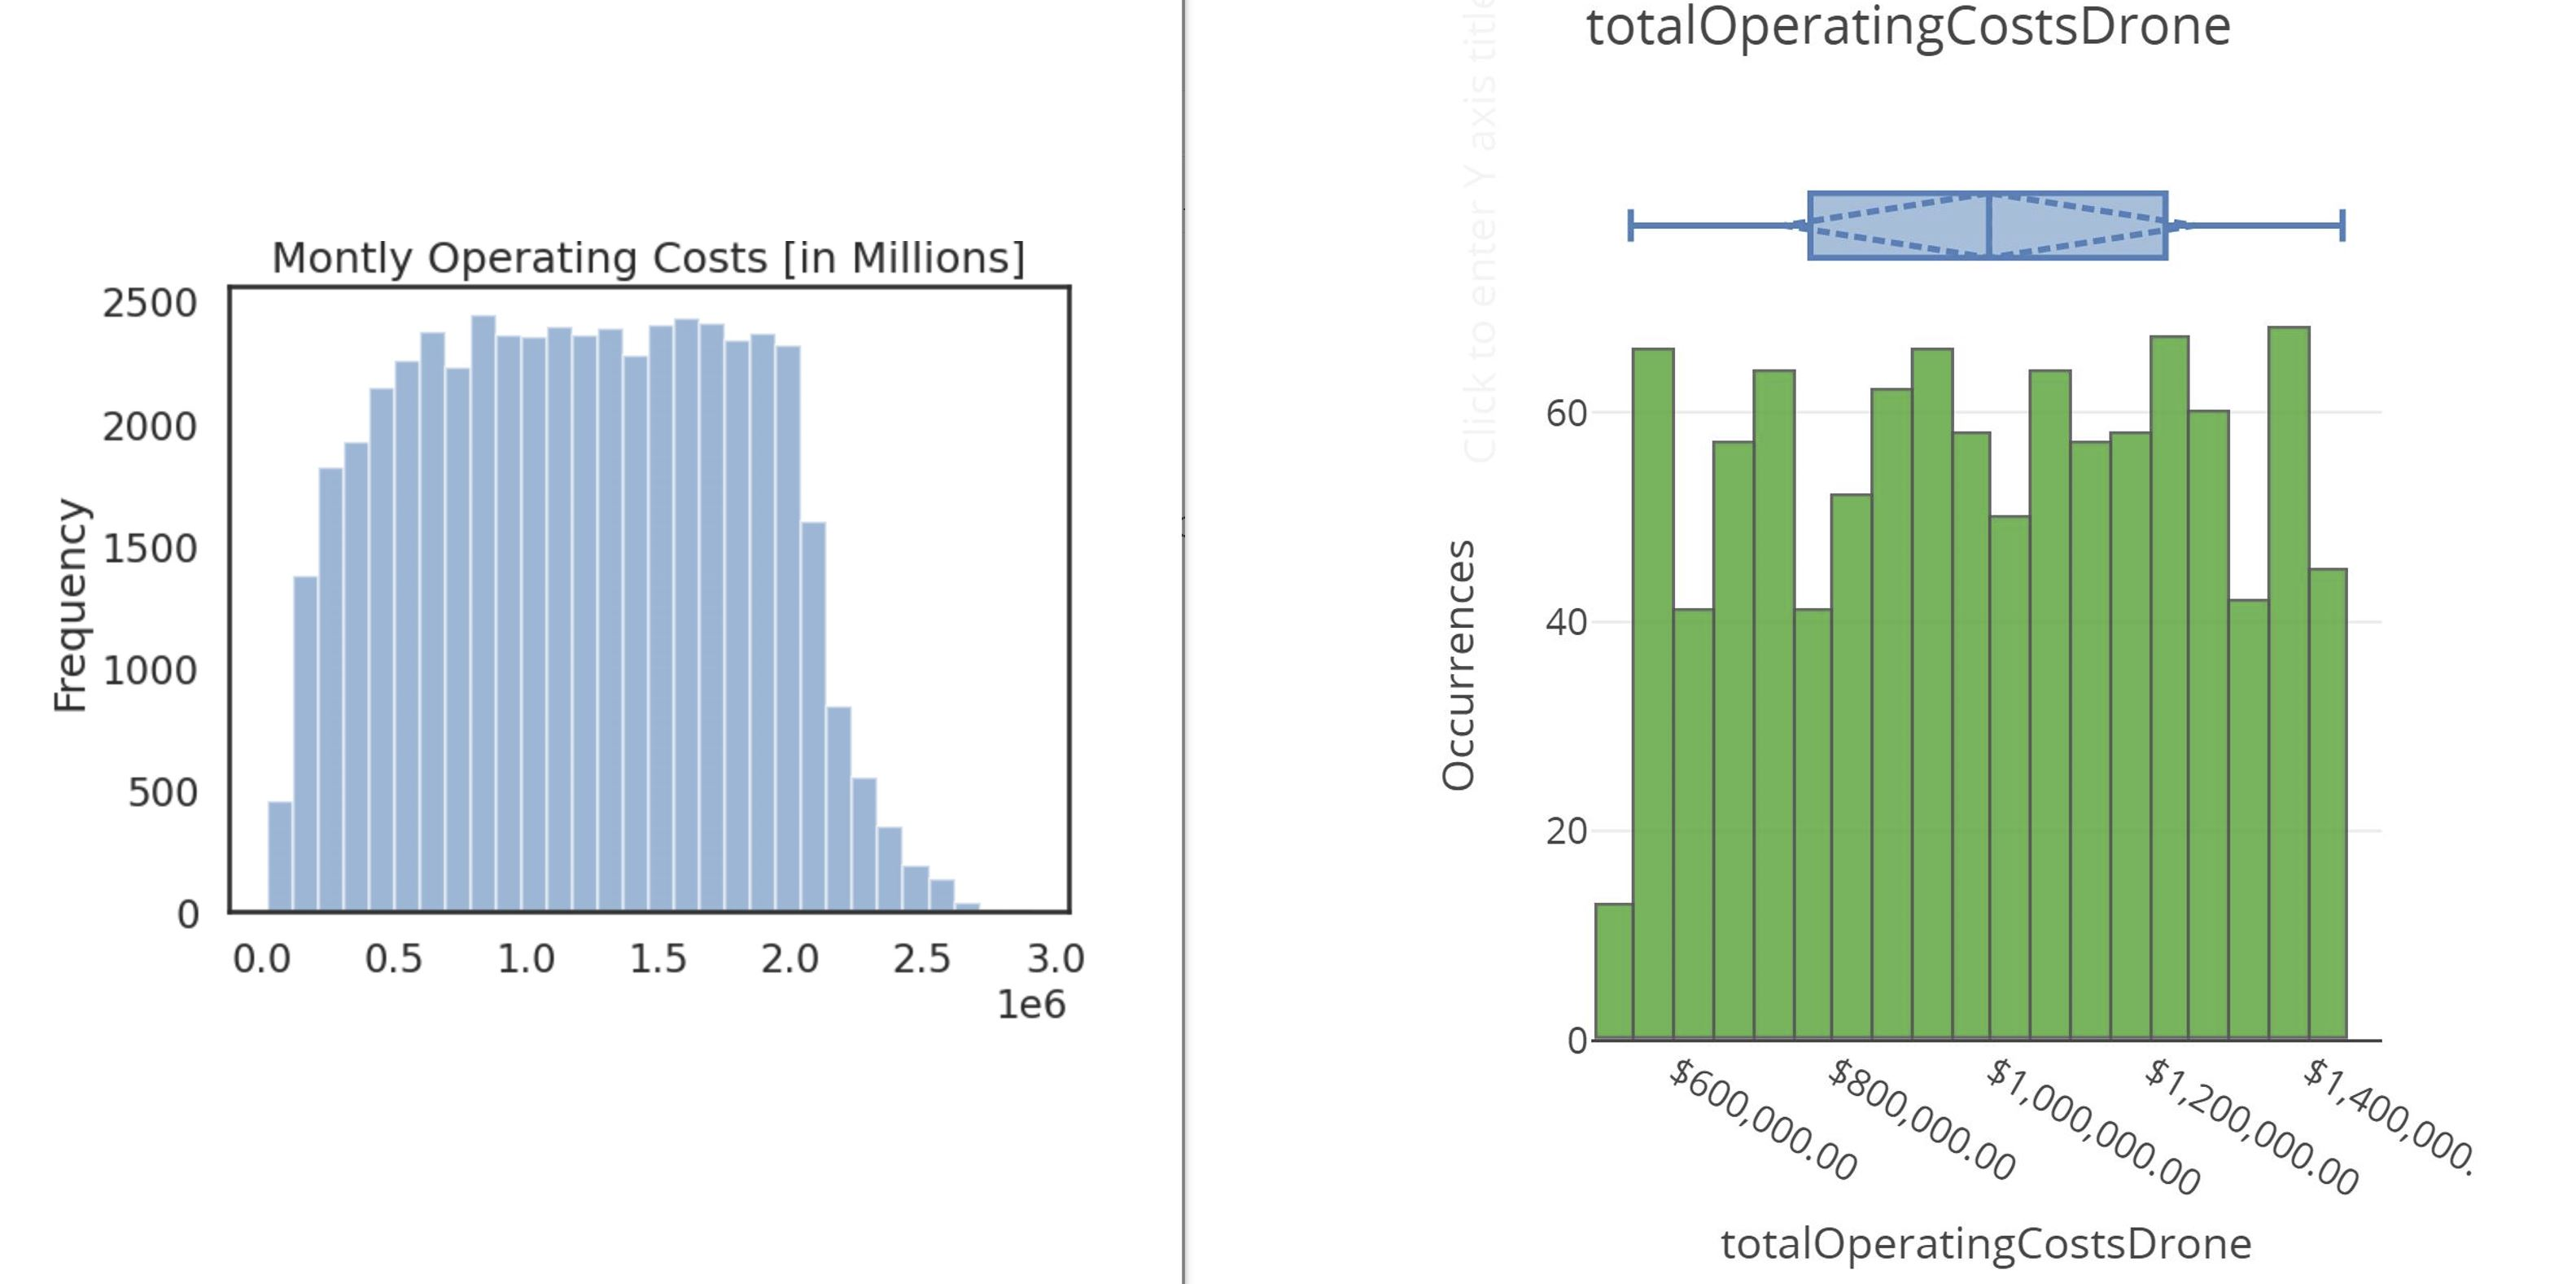

# RMSS Model Summary Notes:
- Courier: 
    - Cost results 25% higher than the cost model (more distance traveled)
    - 14% higher mean delivery times than drones
    - Model does not include GIS data at this time (this was a bummer and would have made the model much more exciting)
    
- No-Batt (Single charge for delivery to target hospital and return to nearest hub)
    - Limits service radius by about 1/2 for small drones
    
- w/Charger Network (Drones charge up at target hospital)
    - Equalizes the response times between standard and emergency but overall increase when compared to battery replacement model
    
- w/Battery Replacement (Battery is completely replaced with fully charged battery at target hospital)
    - Best overall cost 
    - ≈ 19-minute response 
    
- eDrones
    - Best mean emergency response time 18.2-min
    - 15% cost increase over battery replacement

<div align="center">
    <h1>  We asked the team four questions to collect their feedback and lessons learned </h1><br>
</div>

## If you were in charge for a day, what would you change in SysML 2.0?
- "Examples of traditional 'real life' Systems Engineering problems in 2.0 to help explain the process flow."

- "Add a user interface, visualization (GUI)."

- "Enhance diagrams capability. For example: creating swimming lanes in the activity diagram, item flows in the IBD’s, nested states in state diagrams."

- "Add a manual feature to edit the graphs of the diagrams or any visual output. For example, modify the activity diagram to make it more visually sequential and right now there is no way to do that."

- "The ability to change the diagram view. In SysML 1.X you are able to organize the diagram but in SysML 2.0 we don’t have that feature.<br>
    - For example: the black box diagram I created I tried everything to make it more readable."

## What’s the biggest difference between working with SysML 1.X and 2.0?

- "Interface/GUI in SysML 1.X and the command line in 2.0 are two complete different approaches."

- "The modeling process is different. The command line feature makes the modeling intuitive. I prefer the command line feature because I can understand better by creating the logic."

- "Going from drag and drop, to create code in SysML 2.0. Without coding background, the entry level for 2.0 is higher."

- "In SysML 2.0 you need to do exactly what are you going to do. In SysML 1.X there is a lot more help available to play with it and learn that way. The entry level for 1.X is lower because of this."

## What do you think is the biggest strong point of SysML 2.0 today?
- "The JupyterLab plugin was a big contribution, it provided a path to get started and a foundation for the team interaction. This was an example of foresight." 
    - The agnostic environment permitting simplified integration with many open-source tools is a huge advantage (Elrya, SoS, Python, R, etc.)


- "SysML 2.0 simulation integration (NetLogo, etc.) and optimization tool (ModelCenter ex). It provides the capability of doing a more comprehensive a Systems Engineering process from beginning to end." 
    - **It becomes like a one stop shop for everything.**


- "The integration capability with other tools is very powerful. That is very difficult to do in 1.X."

- "Flexibility. You can pretty much do anything (after the learning curve)." 
    - I can get from diagram to diagram very easily and help integrating other tools is a great feature also.
    

## What can be improved in SysML 2.0?
- "The raw model/API connection and raw model management will need more definition."

- "The interconnectivity between the diagrams to look at the bigger picture."

- "Configuration management needs to be considered to make sure multiple modelers are working together (locking system, save previous version of the model, check in and check out)."

- "More robust examples with the coding material specifically would be helpful. For example, the action instructions didn’t include all the pre-steps that needed to be included and this was a challenge."

- "Visualization and interface. A more robust integrated help feature would also be a very good improvement."

## How was your overall experience working with SysML 2.0?
- "I like working with SysML 2.0 it offers more control. Modeling will be more clear and efficnet when fluent in SysML 2.0."

- "I like working with SysML 2.0. It helps me understand the concepts better when I am modeling. When I am working with the diagram, it forces me to think about the syntax and the logic of the model. In SysML 1.X I can create a model, but sometimes I may not understand or comprehend 100% the model or the functionality of the diagrams."

- "There is a lot of potential and I like the work so far. Once I gained a little experience with the coding part, it felt a lot easier to use." 

- "I am in the middle of the fence, closer to liking it. The learning curve was pretty high, but I have average software developing experience. I am concerned about how to transition models already created 1.X to 2.0 or/and culture transition to use the new language (command based)."

### Next Steps

- Update pyMBE and do testing
- Continue collaboration with SysML 2.0 user group 
- Write white paper with findings and submit to a conference 

# Collaborative IDE + SysMLV2 Summary

- Seems like a very powerful combination particularly when one considers the multi-domain analytical capabilities
- SysMLV2 integrates nicely and offers a more flexible low level model building method
- For team collaboration I have not used anything better to date
    - There are efforts underway to provide live multi-user notebooks (I have been testing then out and they work well)
- Given the cohort methods, PMASE should moving the entire program learning tools to an environment such as this
    - Beginners and experts can work side by side with just the right amount of overlap!

<div align="center">
<h1 style="text-align: left; padding-left: 300px;"><span style="color: #339966;">package</span><span style="color: #0000ff;"> 'Thank You!!!'</span> {<br />&nbsp; &nbsp; &nbsp; <span style="color: #339966;">action def</span> <span style="color: #0000ff;">Questions</span><span style="color: #993366;">?</span><br />}</h1>
<-- https://html-online.com/editor/ -->

<p style="padding-left: 200px;"><span style="color: #008000;">package </span><span style="color: #3366ff;">'PMASE Program'</span>{<br />&nbsp; &nbsp; &nbsp;<span style="color: #008000;">action </span><span style="color: #3366ff;">'Thanks'</span> {<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008080;">comment</span> <span style="color: #00ff00;">/* Wonderfully run program guys */</span><br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008000;">first</span>&nbsp; Gary O'Neill;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008000;">then</span> Richard Wise;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Jeremy Doerr;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Santiago Balestrini;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Bjorn Cole;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Mike Shearin;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008000;">finally '<span style="color: #000000;">instructors'{<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008080;">comment</span> <span style="color: #00ff00;">/* Thanks for your help and insight */<br /></span>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; (The Greats) Marshall Bronston; Joe Angle; Brian Berenbach;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Steve Crane;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Andrew Morgan;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Charles Turnista;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Andy Register; <span style="color: #00ff00;">// This guy interviewed me :)<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;<span style="color: #000000;">Larry Kimm;</span><span style="color: #000000;"><br /></span>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #000000;">Marty Broadwell; Tom McDermott;</span><br /></span>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Margaret Loper;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Charles Domercant;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; (Mr.Utility) Doug Bodner;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Chris Cordell;<br /></span></span><span style="color: #008000;"><span style="color: #000000;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;}</span></span><br />&nbsp; &nbsp; &nbsp;}<br />&nbsp; &nbsp; &nbsp;<span style="color: #008000;">action</span> <span style="color: #0000ff;">'Dont Forget'</span>{<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #008080;">comment</span> <span style="color: #00ff00;">/* Thanks for keeping the cohort straight... */</span><br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Jennifer Wooley;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Lindsey Laney;<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Brittany Jackson;<br />&nbsp; &nbsp; &nbsp;}<br />}</p>
<p style="padding-left: 200px;">&nbsp;</p>

<div align="center">
    <h1>  Backup Slides </h1>

### Black Box Specification

In [15]:
package 'Drone Delivery System Black Box Spec' {
	import ScalarValues::*;
	
    item def medicalSupplies;
    item def medicalSuppliesTransit;
    item def medRequest;
        
        part DeliverySystemBlackBox {
        
            part DroneDeliverySystem {
                port medicineOut: medicineDropoff;
                port medicineIn: medicineDropoff;
            }
            part HubHospital {
                port medicineSend: medicineDropoff;
                port medicineRequestReceived: medicineReq;
            }
            part DeliveryHospital[2..5] {
                port medicinePickup: medicineDropoff;
                port medicineRequest: medicineReq;
            }
      
            port def medicineDropoff {
                //flow properties
                //attribute medicine : Real;
                out item medicineSent: 'Drone Delivery System Black Box Spec'::medicalSupplies;
                in item medicineReceive: 'Drone Delivery System Black Box Spec'::medicalSupplies;
            }

            port def medicineReq {
                //flow properties
                in item Fulfill: 'Drone Delivery System Black Box Spec'::medRequest;
                out item Request: 'Drone Delivery System Black Box Spec'::medRequest;
            }
            
            interface def MedicineInterface {
                end medOut : medicineDropoff;
                end medIn : ~medicineDropoff;
            }
        
        flow medicalSupplies
               from HubHospital::medicineSend  
                 to DroneDeliverySystem::medicineIn;
            
        flow medicalSuppliesTransit         
                from DroneDeliverySystem::medicineOut  
                  to DeliveryHospital::medicinePickup;
            
        flow medRequest
                from DeliveryHospital::medicineRequest  
                  to HubHospital::medicineRequestReceived;
        flow HubHospital::medicineSend to DeliveryHospital::medicinePickup;
            
        
        connect DroneDeliverySystem::medicineIn to HubHospital::medicineSend;
        connect DroneDeliverySystem::medicineOut to DeliveryHospital::medicinePickup;
        connect DeliveryHospital::medicineRequest to HubHospital::medicineRequestReceived;
            
        }
}

Package Drone Delivery System Black Box Spec (8bfe09a8-88de-4982-929b-afbe99b91bc1)


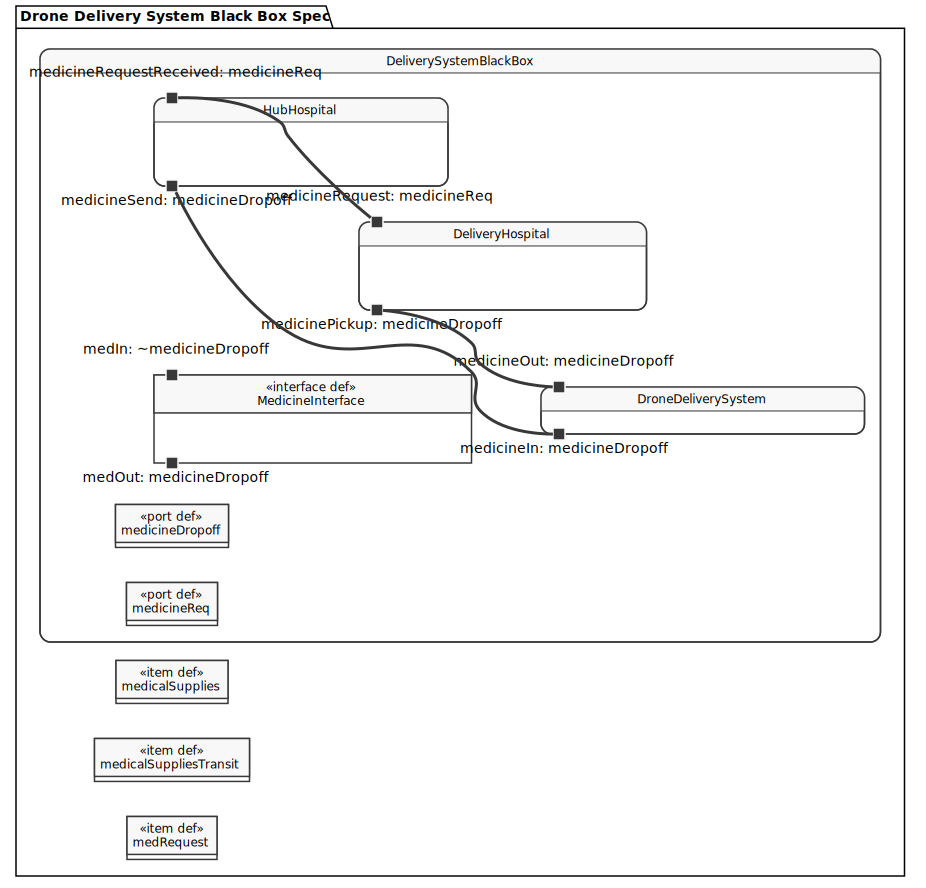

In [16]:
%viz --view=interconnection "Drone Delivery System Black Box Spec" --style=LR

### Requirements Diagram

In [11]:
package Requirements {
    
    import ScalarValues::*;
    //import SupplyMedicalSupportSystem::*;
    requirement def id '1' Payload{
        doc /* System shall be capable of carrying a minimum of 10 pounds. */
            
            attribute massLoad : Real;
            attribute massCapacity : Real;
            require constraint { massLoad <= massCapacity }
            
            requirement def id '1.1' PayloadCapacity{
            doc /* UAV shall be capable of carrying multiple packages in its payload */
                
                attribute packageTotalMass: Real;
                attribute massLoad = packageTotalMass;
                assume constraint {packageTotalMass > 0 }
            }
            requirement def id '1.2' PayloadHandling{
            doc /* UAV shall be capable of safely carrying payloads sensitive to vibration and g forces */
                attribute packageGforce: Real;
                //attribute packageVibration = Real (Hz?);
                require constraint {0.8<= packageGforce <= 1.2 }
            }
            requirement def id '1.3' PayloadTemperatureControl{
            doc /* UAV shall be capable of safely maintaining payload temperatures up to -40 degrees celcius during delivery */
            }
    }
    requirement def id '2' NumberOfHospitals{
        doc /* Drone system shall be capable of serving a minimum of 3 locations */
            subject Hospitals;
            requirement def id '2.1' SystemCapacity{
            doc /* Delivery system shall include a minimum of 6 UAVs with capability to add more UAVs */
             comment /*  Rationale
        
        # Minimum number of UAVs determined by doubling the minimum number of serviced locations for availability
        # Allows for emergency runs when required as other deliveries are made*/
        }
    }
    requirement def id '3' DistributionSetup{
        doc /* There shall be two main hospitals that UAVs will leave from and return to (hubs) */
            subject Hospitals;
            requirement def id '3.1' CentralControl{
            doc /* Hub facility shall allow for monitoring and manned control of all UAVs in the system */
            }
                
                requirement def id '3.2' BatteryCharging{
            doc /* UAV battery charging shall be done whenever the UAV is at the HUB */
            }
                
                requirement def id '3.3' HubCapacity{
            doc /* HUB shall be capable of docking all UAVs in the system */         
        }
                requirement def id '3.4' UAVEmergency{
            doc /* In case of emergency, UAV shall be recovered and returned to the hub for troubleshooting and maintenance */         
        }
        
    }
    requirement def id '4' Distance{
        doc /* The UAV shall be able to travel a minimum of 25 miles round trip */
            attribute milesActual : Real;
            attribute milesLimit : Real;
            subject UAV;
            require constraint { milesActual <= milesLimit }
        
            requirement def id '4.1' BatteryRuntimeDuration{
            doc /* The UAV shall be capable of running on battery long enough to meet the distance requirement plus reserve. */
                
                requirement def id '4.1.1' BatteryCapacity{
                doc /* UAV shall only initiate delivery when battery level is sufficient for delivery route plus 10% reserve */
                    attribute batteryLevel : Real;
                    assume constraint {batteryLevel > 0 }
            }
        }
    }
    requirement def id '5' ResponseTime{
        doc /* The UAV shall deliver payloads within 40min, 90% of the time */
            attribute minutesLimit : Real;
            attribute minutesActual : Real;
            subject UAV;
            require constraint { minutesActual <= minutesLimit }
        
            requirement def id '5.1' ResponseTimeLogging{
            doc /* Drone System shall include a data logging system for delivery time tracking */
            }
        
            requirement def id '5.2' UnmannedControl{
            doc /* Drone system shall allow for autonomous deliveries on prescribed routes */
            }
            requirement def id '5.3' ResponsePriority{
            doc /* Drone system shall allow for prioritization of urgent deliveries to be delivered within 15 minutes */
            }
            requirement def id '5.4' Speed{
            doc /* The UAV shall be able to maintain a speed high enough to meet the response time requirement. */
                
                requirement def id '5.4.1' UAVRouting{
                doc /* UAV delivery routes shall be as efficient and direct as allowable */
                }
                requirement def id '5.4.2' SpeedAdjustment{
                    doc /* UAV shall allow for adjusting of speed depending on environment */
                }
                requirement def id '5.4.3' SpeedPriority{
                    doc /* System shall allow for prioritizing speed for urgent deliveries */
                }
            } 
    }
    requirement def id '6' Reliability{
            doc /* Drone system shall deliver payloads safely 95% of the time */   
                
                requirement def id '6.1' PriorityDeliveryReliability{
                doc /* High priority deliveries shall be delivered safely 99% of the time  */
                    attribute priorityDeliverySuccessRate : Real;
                    require constraint {priorityDeliverySuccessRate > 0.99}
                }  
    }  
    requirement def id '7' Cost{
        doc /* The total system cost shall not exceed $500,000 per year */
            //attribute dollars : Real;
        
            requirement def id '7.1' PurchaseCost{
            doc /* The total system purchase cost shall not exceed XXX */
            }
        
            requirement def id '7.2' OperatingCost{
            doc /* The operatings cost per hour shall be less than $42 */
            }
    }
    
    requirement def id '8' OperatingParadigm{
        doc /* The drone system operation shall be done by third party with hospital oversight */
            requirement def id '8.1' PayloadPreparation{
            doc /* Drone system payload preparation and loading shall be done by qualified hospital personnel */
            }
    }
    
    requirement def id '9' Availability{
        doc /* The drone system shall maintain greater than 95% availability for deliveries */
        //require  BatteryCharging;
    
        requirement def id '9.1' OperatingAvailability{
            doc /* The drone system shall be available 24 hours a day, every day of the year for deliveries */
            }
    }  
    
    requirement def id '10' RouteFlightPlanning{
        doc /* The UAV flight planning shall be initially handled by the UAV pilot using waypoint planning with on board emergency mission planned in case of connection issues */
            
            requirement def id '10.1' RouteRestrictions{
            doc /* The drone system route planning will avoid restricted flight areas in accordance to FAA and local rules */
            }
    }
    
    requirement def id '11' Tracking{
        doc /* The UAV shall be trackable by both the sender and receiver */
            subject UAV;
            requirement def id '11.1' TrackingStats{
                doc /* The UAV tracking tool shall provide estimated time of arrival (ETA) and notify of any changes to route */
                }
            requirement def id '11.2' TrafficManagement{
                doc /* The UAV shall be configured to conform to FAA requirements for UAS tracking and Traffic management (FAA UTM) */
                }

    }
}

Package Requirements (d60eb0fc-d652-4947-ac75-322cbe98fb03)


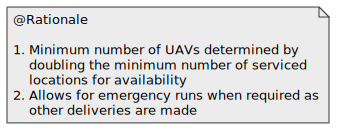

In [12]:
%viz Requirements --style=LR

### Internal Block Diagram

In [13]:
package SupplyMedicalSupportSystem{
    /*doc BDD and IBD */
    	import ScalarValues::*;
    //item def Power;
    part RuralHospitalSupport{
 		part droneSystem[1..*]{
           part avionics{
              part wings{
                  port startWingsRotation;
              }
              //part cockpit;
              part engine{
                  port engineRunIn;
                  port getEnginePower;
              }
              part propeller{
                  port getPropellerPower;
                  port openWings;
              }
              part processor{
                  port wakeupDrone; 
                  port engineRunCmd;
                  port propellerStartCmd;
                  port setupPath;
                  port getDestInfo;
                  port heartbeatSignalSend;
                  port fetchMedicines;
                  port deliverMedicines;
              }
              connect processor::engineRunCmd to engine::engineRunIn;
              connect processor::propellerStartCmd to propeller::openWings;
              connect propeller::openWings to wings::startWingsRotation;
              
           }
           part commAndControl{
                part gps;
           }
           part power{
               part battery[1..2]{
                   port powerOut;
               }
               //part userInterface;
           } 
           part payload{
               port liftObject;
           }
           connect power::battery::powerOut to avionics::propeller::getPropellerPower;
           connect power::battery::powerOut to avionics::engine::getEnginePower;
           connect avionics::processor::fetchMedicines to payload::liftObject;
           connect avionics::processor::setupPath to commAndControl::gps;
           comment about power /* Wakeup on command from Central Hub */
           comment about commAndControl /* Gets destination information, setup route */
           comment about droneSystem /* Flies to Central Hub, Picks Medicines, delivers at Rural Hospital */
           
           //stream of Power from power::battery::powerOut::providePower to avionics::propeller::battInput::inPower;
       }
		part ruralHospitals[2..5]{
            //part inventory;
            part communication{
                port Order;
                port sendOrder;
                port rxMedicines;
            }
            part personnel{
                port commOrder;
                port getMedicines;
            }
            connect personnel::commOrder to communication::Order;
            connect communication::rxMedicines to personnel::getMedicines;
            comment about ruralHospitals /* Personnel places medicinal support order to central Hub */
            comment about personnel /*Collects delivered medicines */
        }
        
		//
		part centralHub{
            part centralCommunication{
                port orderRx;
                port startCmdDrone;
                port wakeDrone;
                port sendDestData;
            }
            //part inventory;
            part processor{
                port receivedOrder;
                port prepMedicine;
                port commDroneCmd;
                port medReady;
            }
            part tracker{
                //port currentLoc;
                port rxMonitorSignal;
            }
            part medicines[1..*]{
                part equipment;
                port rxCommand;
                port packMedicine;
            }
            connect centralCommunication::orderRx to  processor::receivedOrder;
            connect processor::prepMedicine to medicines::rxCommand;
            connect medicines::packMedicine to processor::medReady;
            connect processor::commDroneCmd to centralCommunication::startCmdDrone;
            comment about centralHub /* Central Hub receives order, asks Drone to be ready, makes medicine prepration */
        }
        connect ruralHospitals::communication::sendOrder to centralHub::centralCommunication::orderRx;
        connect centralHub::centralCommunication::wakeDrone to droneSystem::avionics::processor::wakeupDrone;
        connect centralHub::centralCommunication::sendDestData to droneSystem::avionics::processor::getDestInfo;
        connect droneSystem::avionics::processor::heartbeatSignalSend to centralHub::tracker::rxMonitorSignal;
        connect centralHub::processor::medReady to droneSystem::avionics::processor::fetchMedicines;
        connect droneSystem::avionics::processor::deliverMedicines to ruralHospitals::communication::rxMedicines;
        //connect centralCommunication::orderRx to  
        //part def Engine;
        //part def Sensor[1..*];
   }
}

Package SupplyMedicalSupportSystem (ef018b19-b949-455d-8e88-e77d8a517de4)


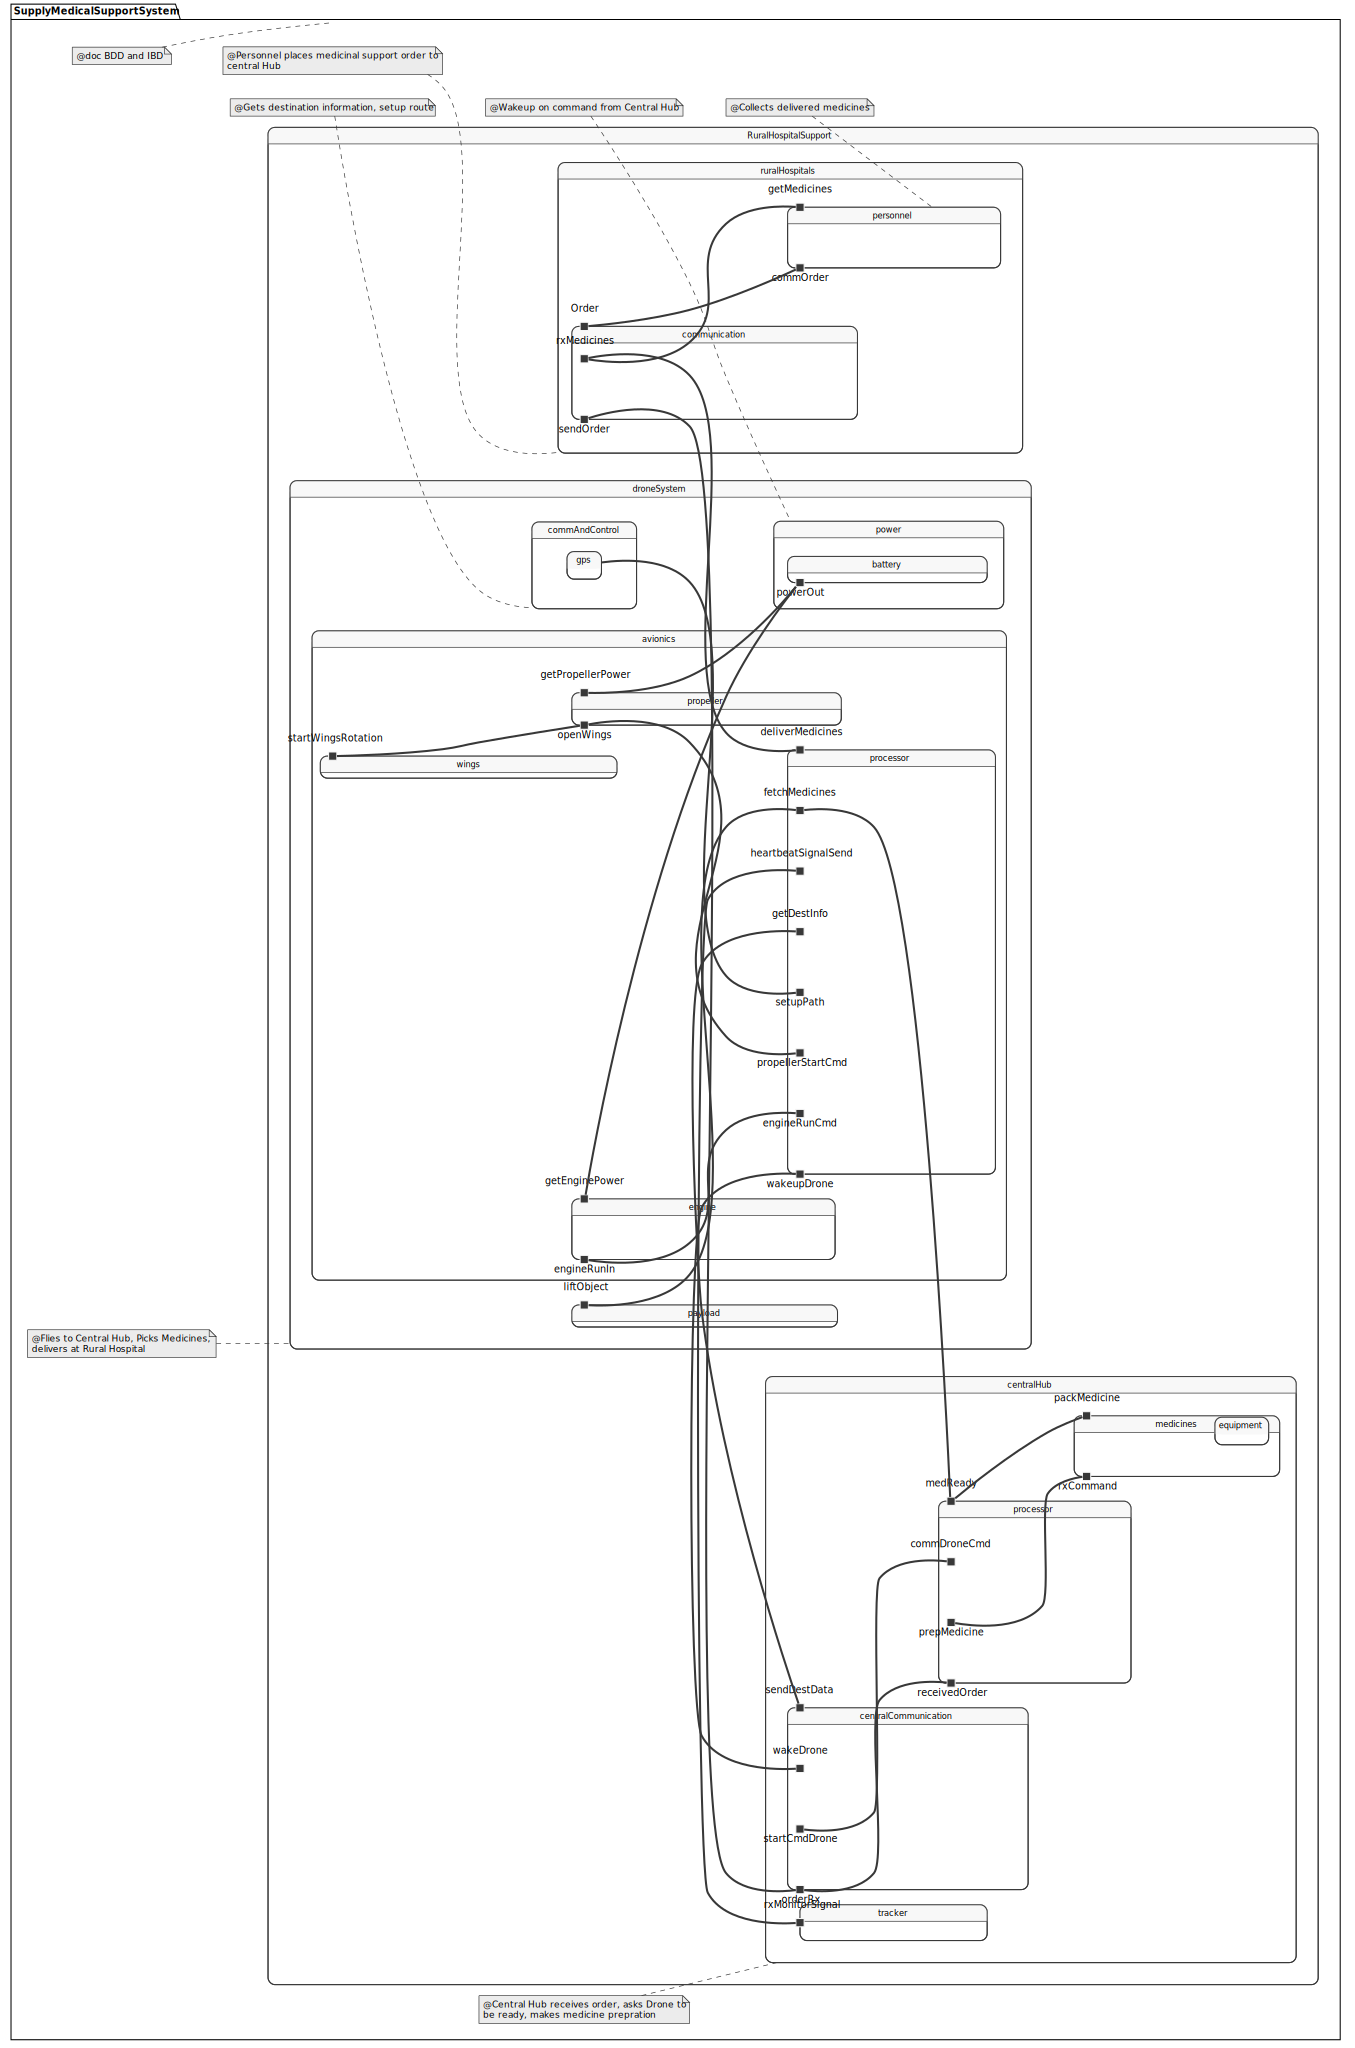

In [14]:
%viz --view=interconnection --style=LR SupplyMedicalSupportSystem

<div align="center">
    <h1>Use Cases</h1>

<center>
    <img src="images/Top Level Operation-UseCase.svg" style="width:1200px;height:800px"/>
<center>

<center>
    <img src="images/Piloting UAV-UseCase.svg" style="width:1200px;height:800px"/>
<center>

<center>
    <img src="images/Ground2.jpg" style="width:1200px;height:750px"/>
<center>

<center>
    <img src="images/Drone2.jpg" style="width:1200px;height:750px"/>
<center>